# COVID-19 🇮🇹

Libraries and Plotting Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

In [67]:
sns.set_context("poster")

plt.rcParams["figure.figsize"] = (12,8) 
plt.rcParams["figure.dpi"] = 300

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


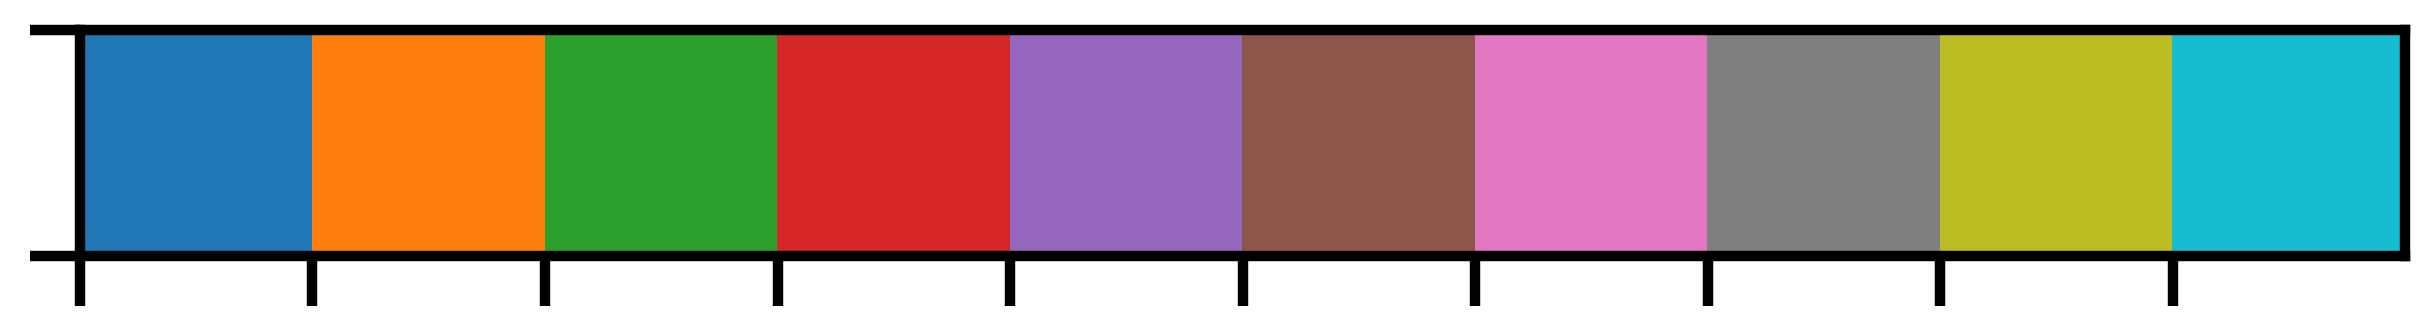

In [4]:
pal = sns.color_palette()

sns.palplot(pal)
print(pal.as_hex())

Loading data from `https://github.com/pcm-dpc/COVID-19` (Italian Protezione Civile official GitHub repository)

In [5]:
PATH = "../COVID-19/dati-andamento-nazionale/"
FILE = "dpc-covid19-ita-andamento-nazionale.csv"

In [6]:
df = pd.read_csv(PATH+FILE, sep=',')

In [7]:
df['casi_conclusi'] = df['deceduti']+df['dimessi_guariti']

In [8]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_conclusi
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324,8
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623,11
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587,15
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014,62
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695,67


# Analysis

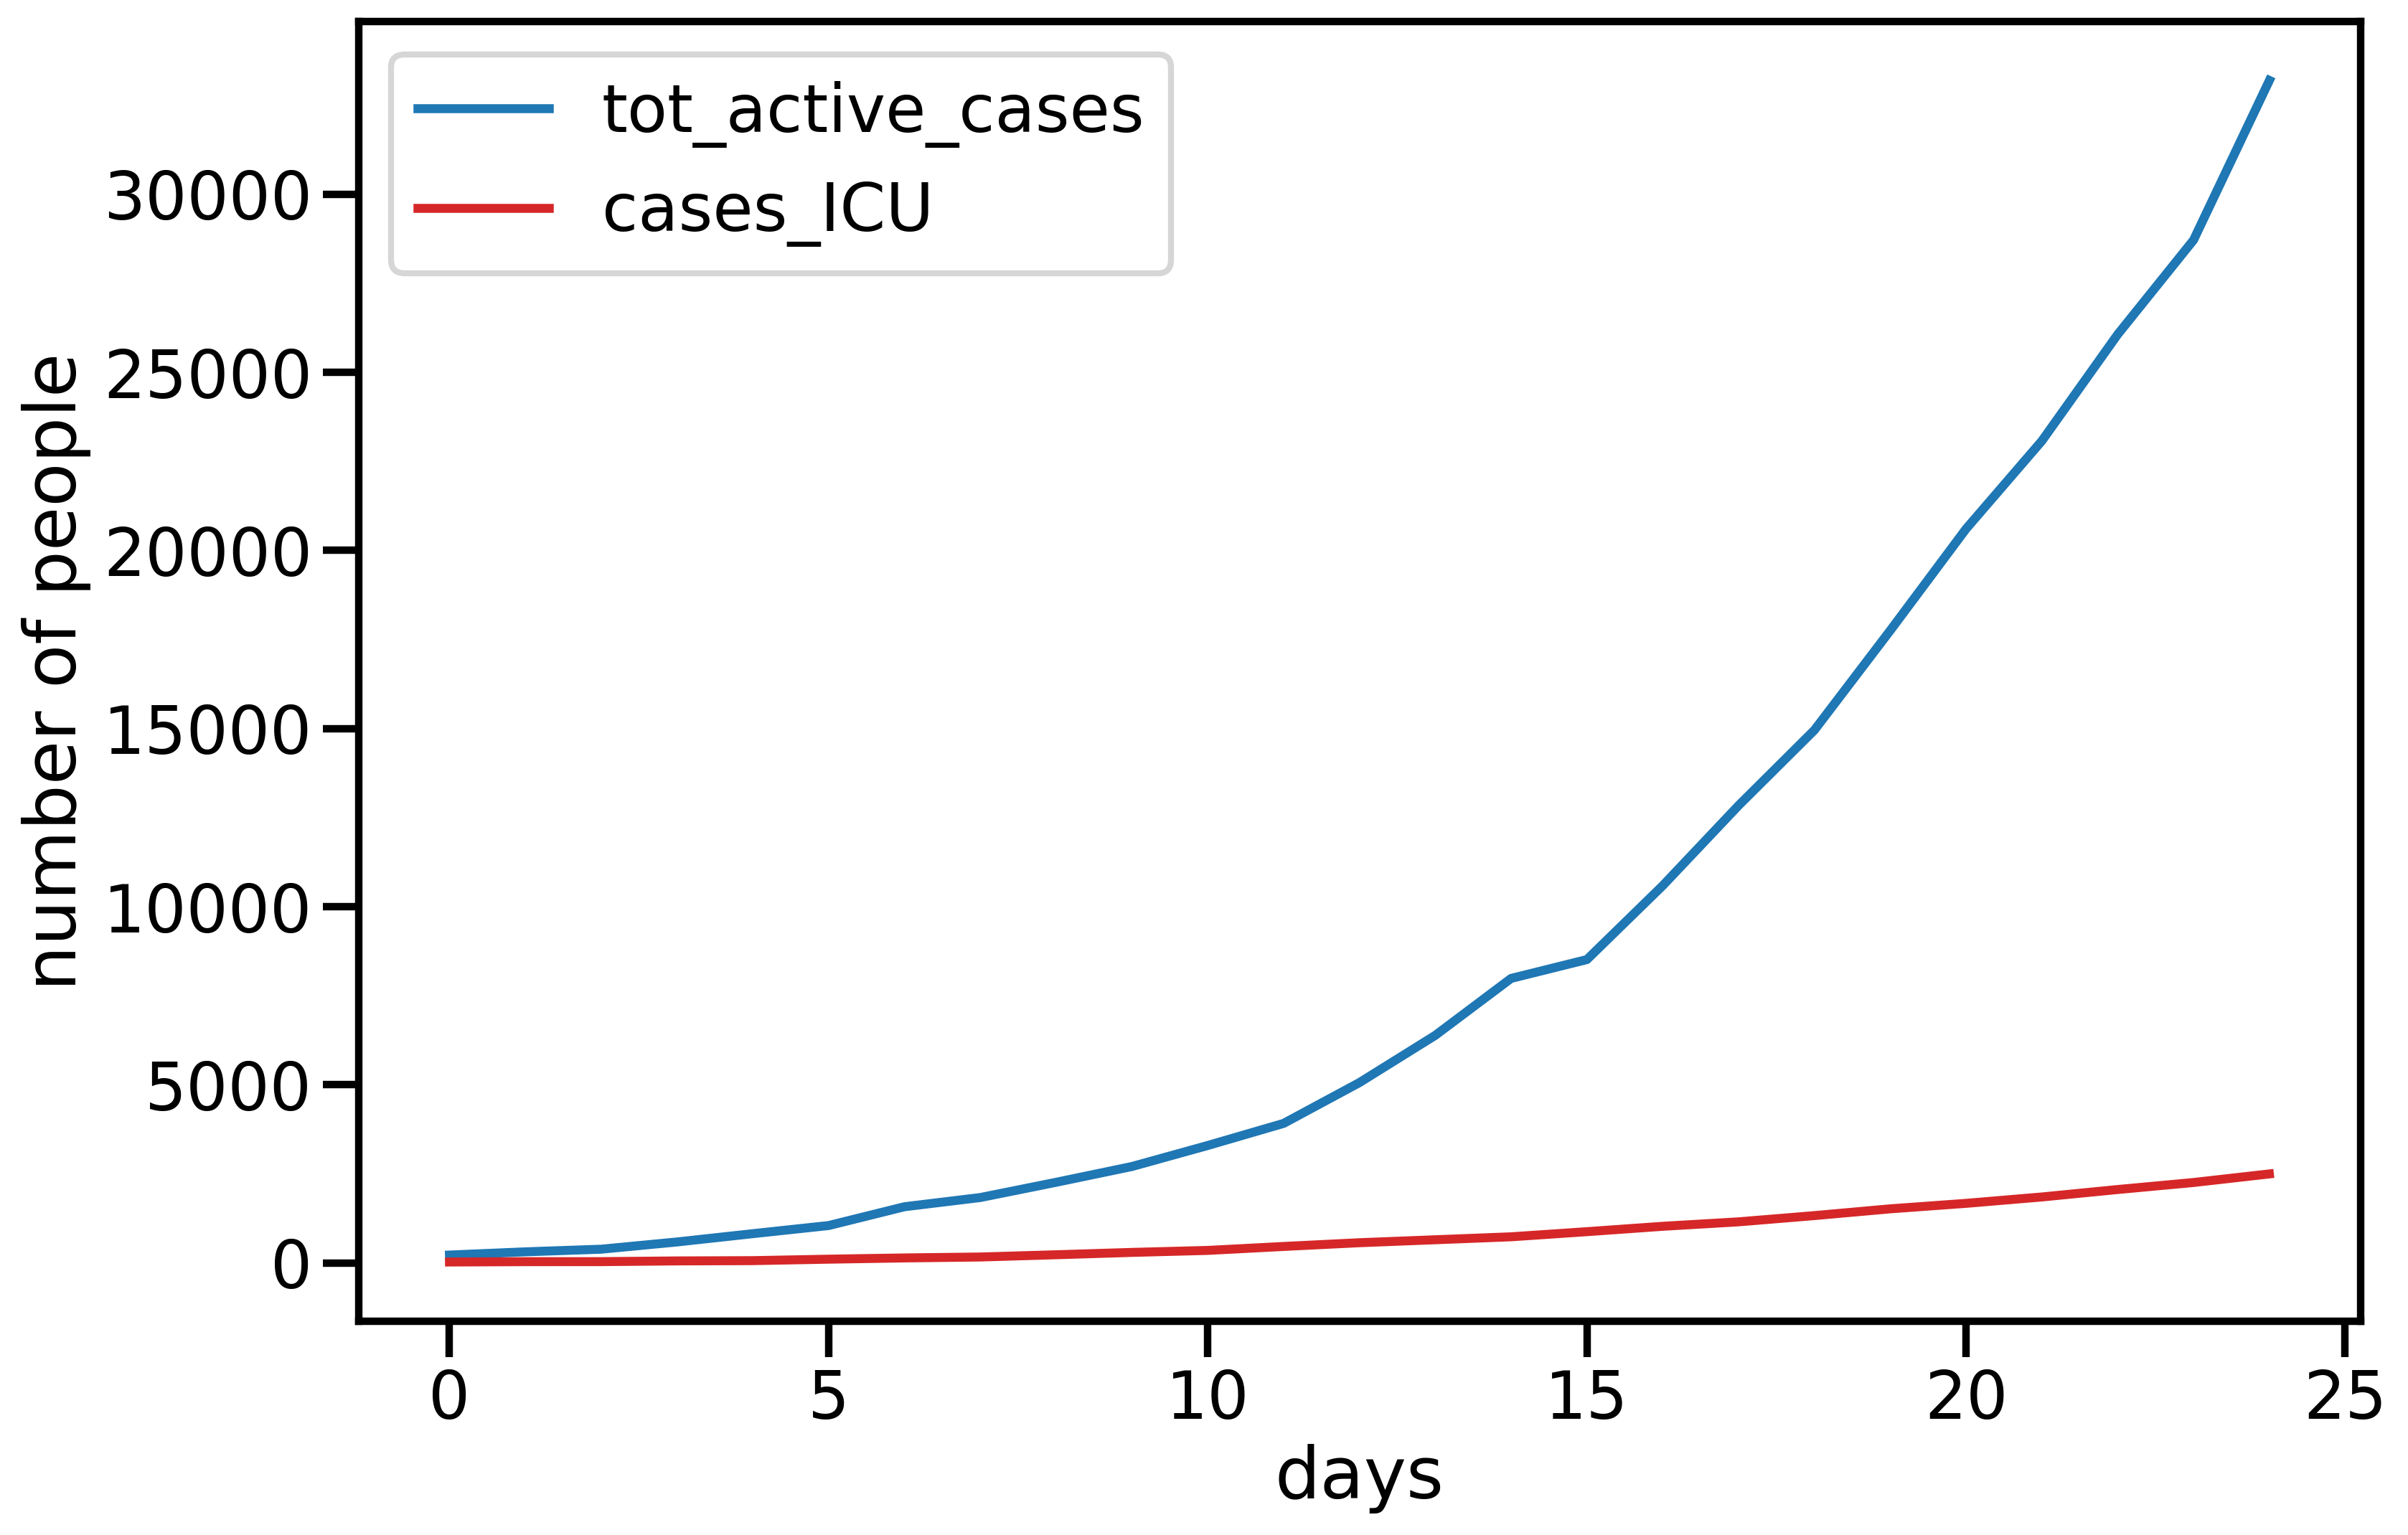

In [9]:
df['totale_attualmente_positivi'].plot(label='tot_active_cases')
df['terapia_intensiva'].plot(label='cases_ICU', color='#d62728')

plt.xlabel('days')
plt.ylabel('number of people')

plt.legend()

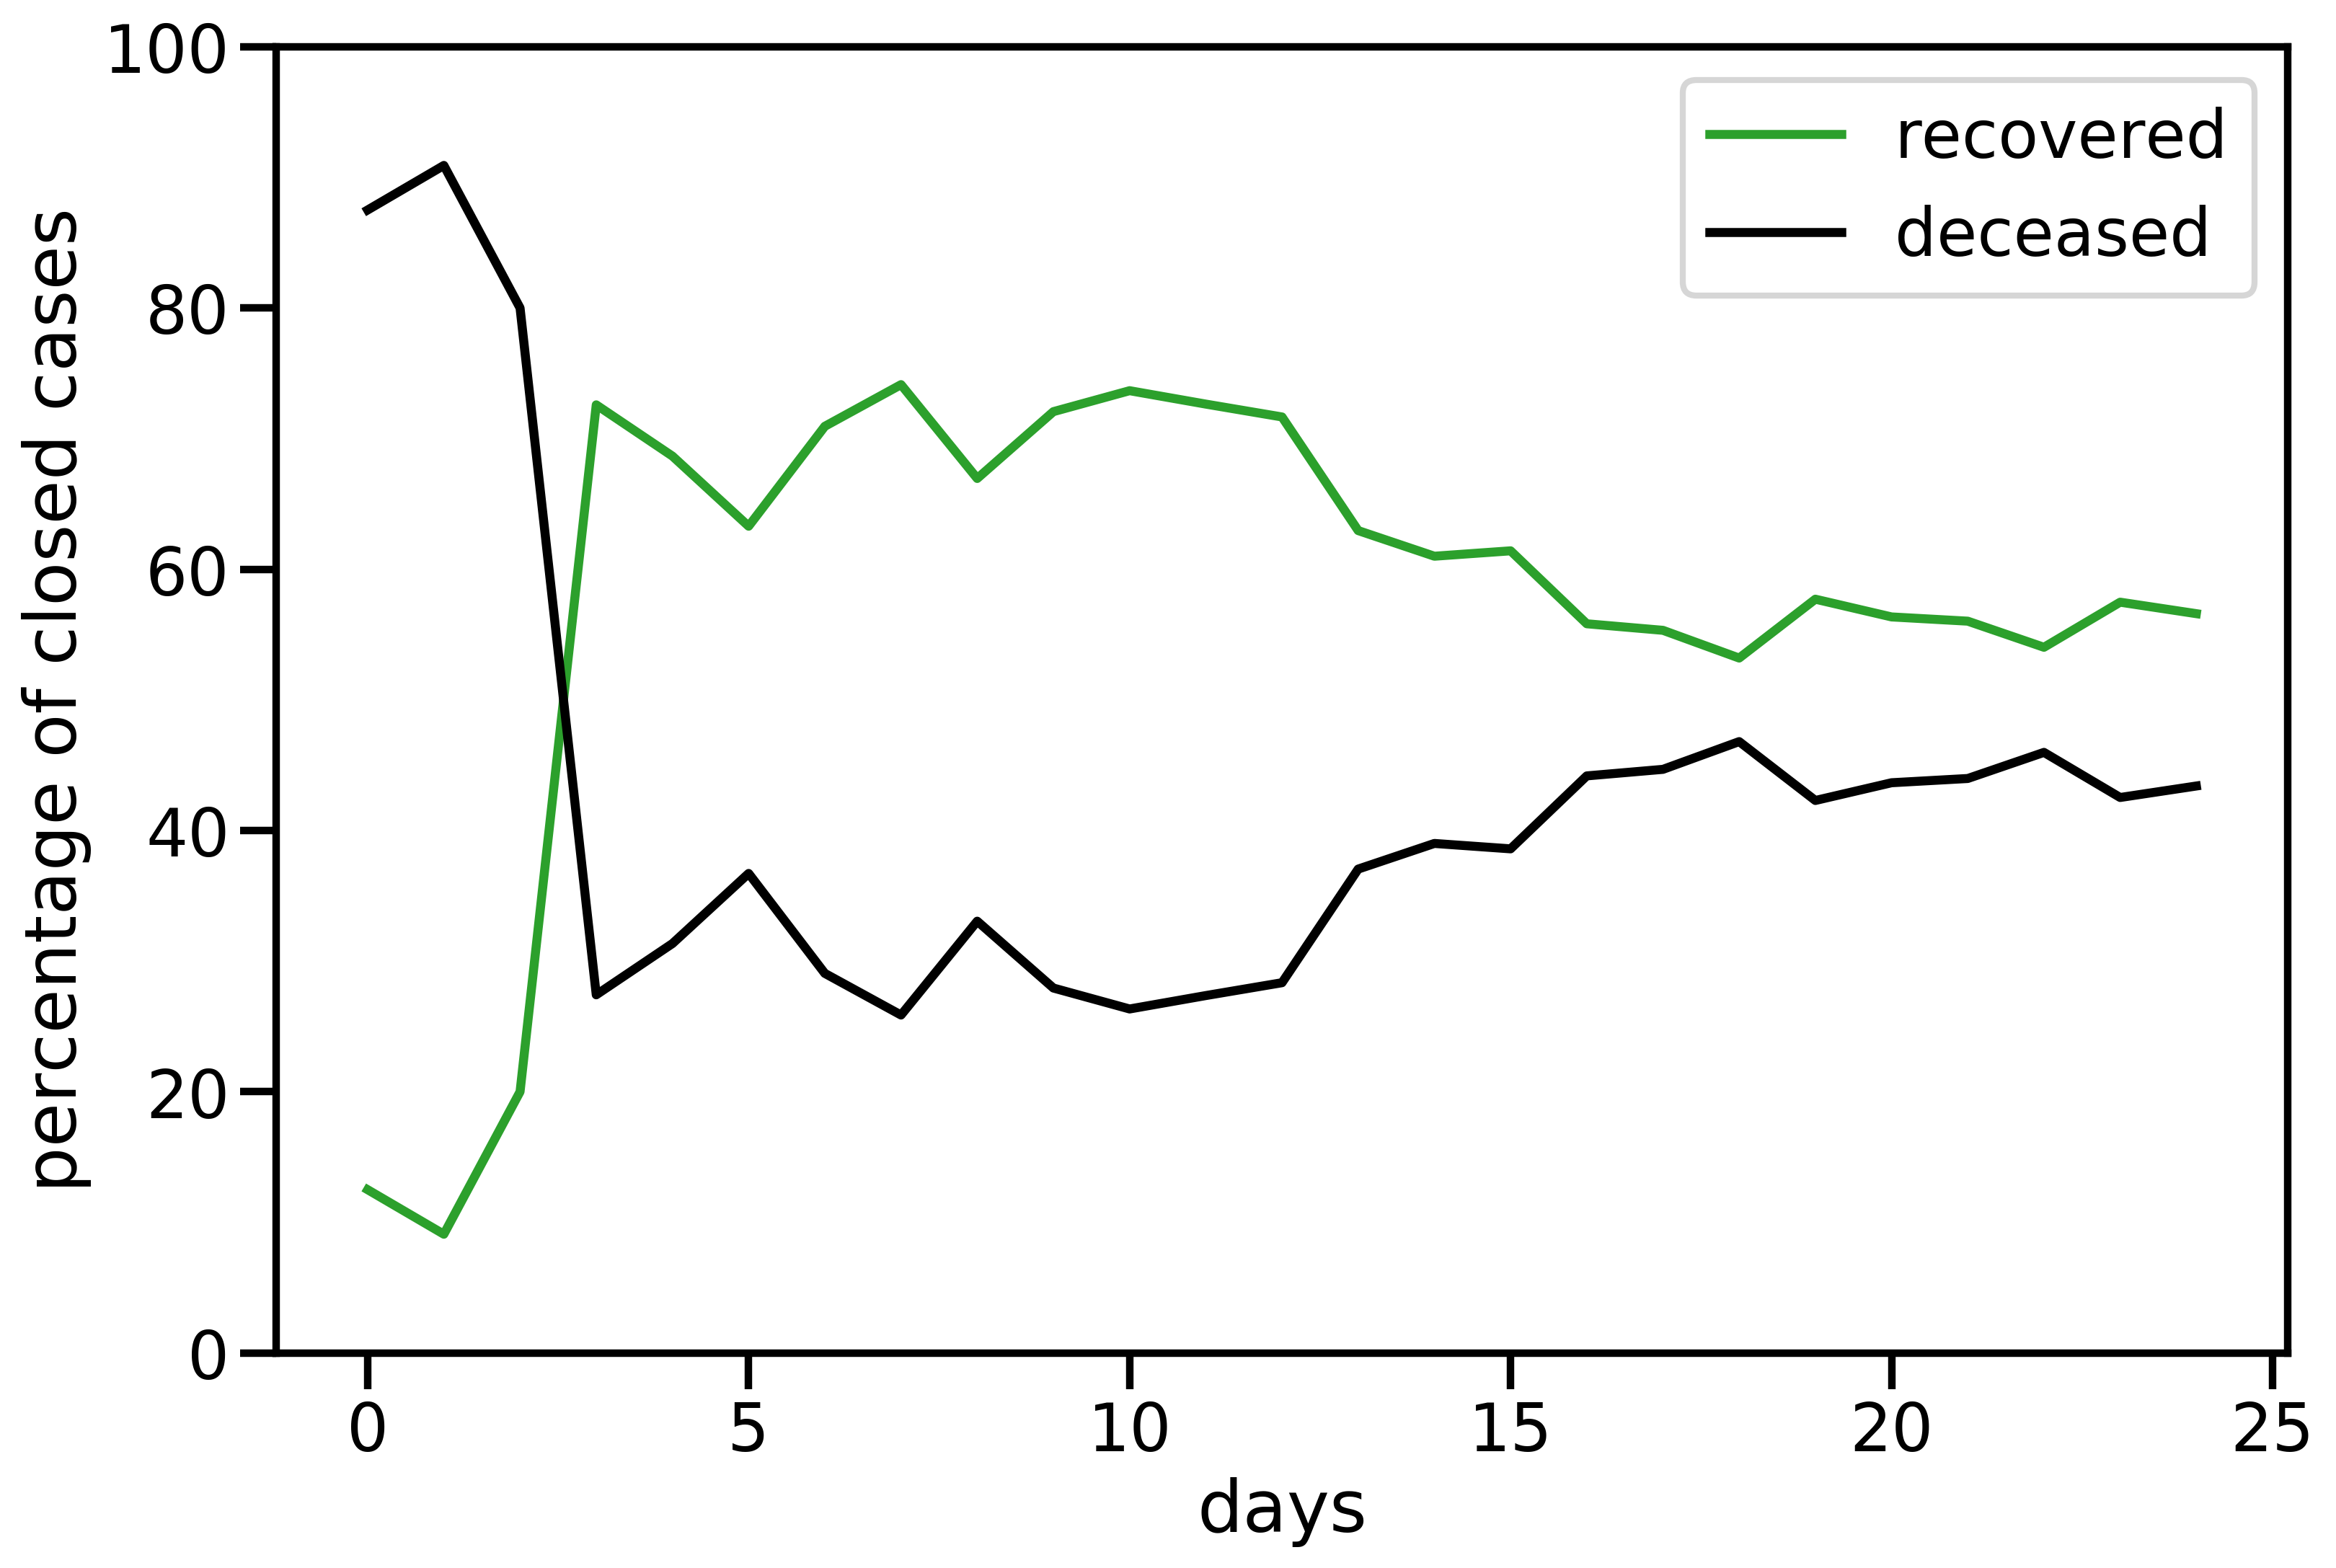

In [10]:
plt.plot((df['dimessi_guariti']/df['casi_conclusi'])*100, label='recovered', color='#2ca02c')
plt.plot((df['deceduti']/df['casi_conclusi'])*100, label='deceased', color='black')
plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of closed cases')

plt.legend()

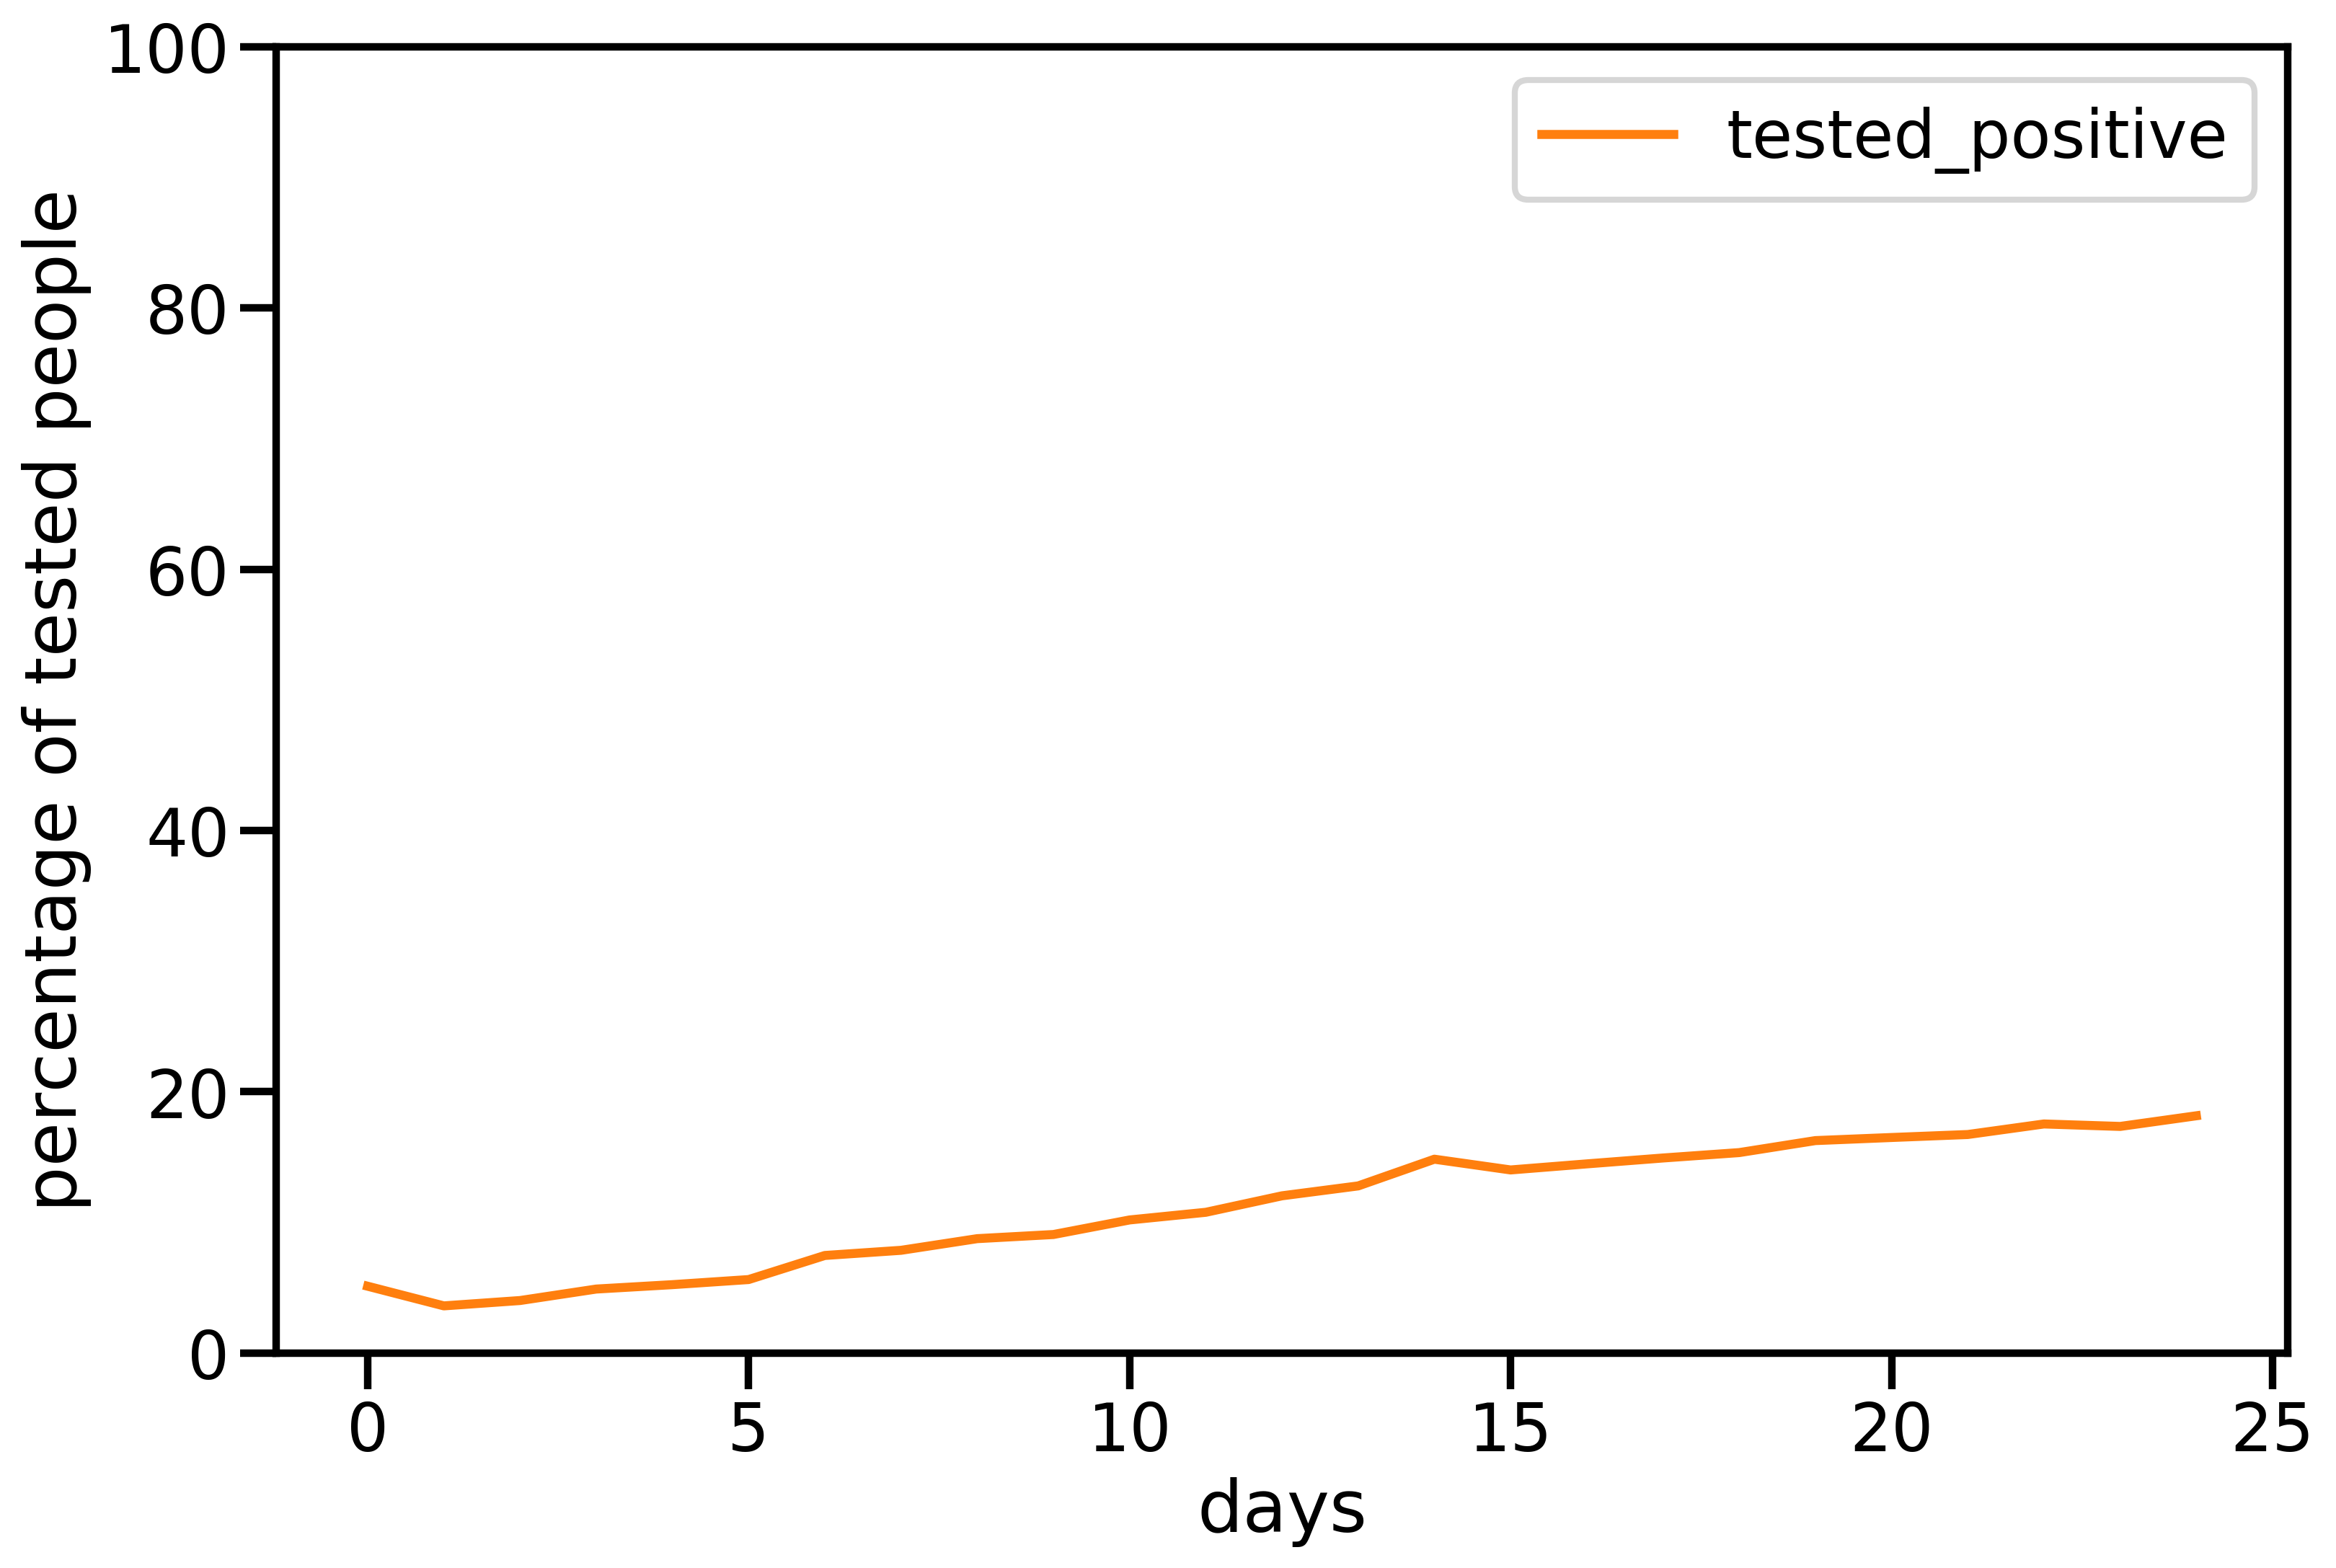

In [11]:
plt.plot((df['totale_attualmente_positivi']/df['tamponi'])*100, label='tested_positive', color='#ff7f0e')

plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of tested people')

plt.legend()

In [13]:
positives_yesterday = df['nuovi_attualmente_positivi']
positives_yesterday = pd.concat([pd.Series([0]), positives_yesterday])
positives_yesterday = positives_yesterday.reset_index()
del positives_yesterday['index']

positives_yesterday.drop((len(positives_yesterday)-1))

df['nuovi_positivi_ieri'] = positives_yesterday

In [17]:
cases_yesterday = df['totale_attualmente_positivi']-df['nuovi_attualmente_positivi']
for i in range(len(cases_yesterday)):
    if (cases_yesterday[i] == 0):
        cases_yesterday[i]=df['nuovi_attualmente_positivi'].iloc[i]
        
df['totale_attualmente_positivi_ieri'] = cases_yesterday

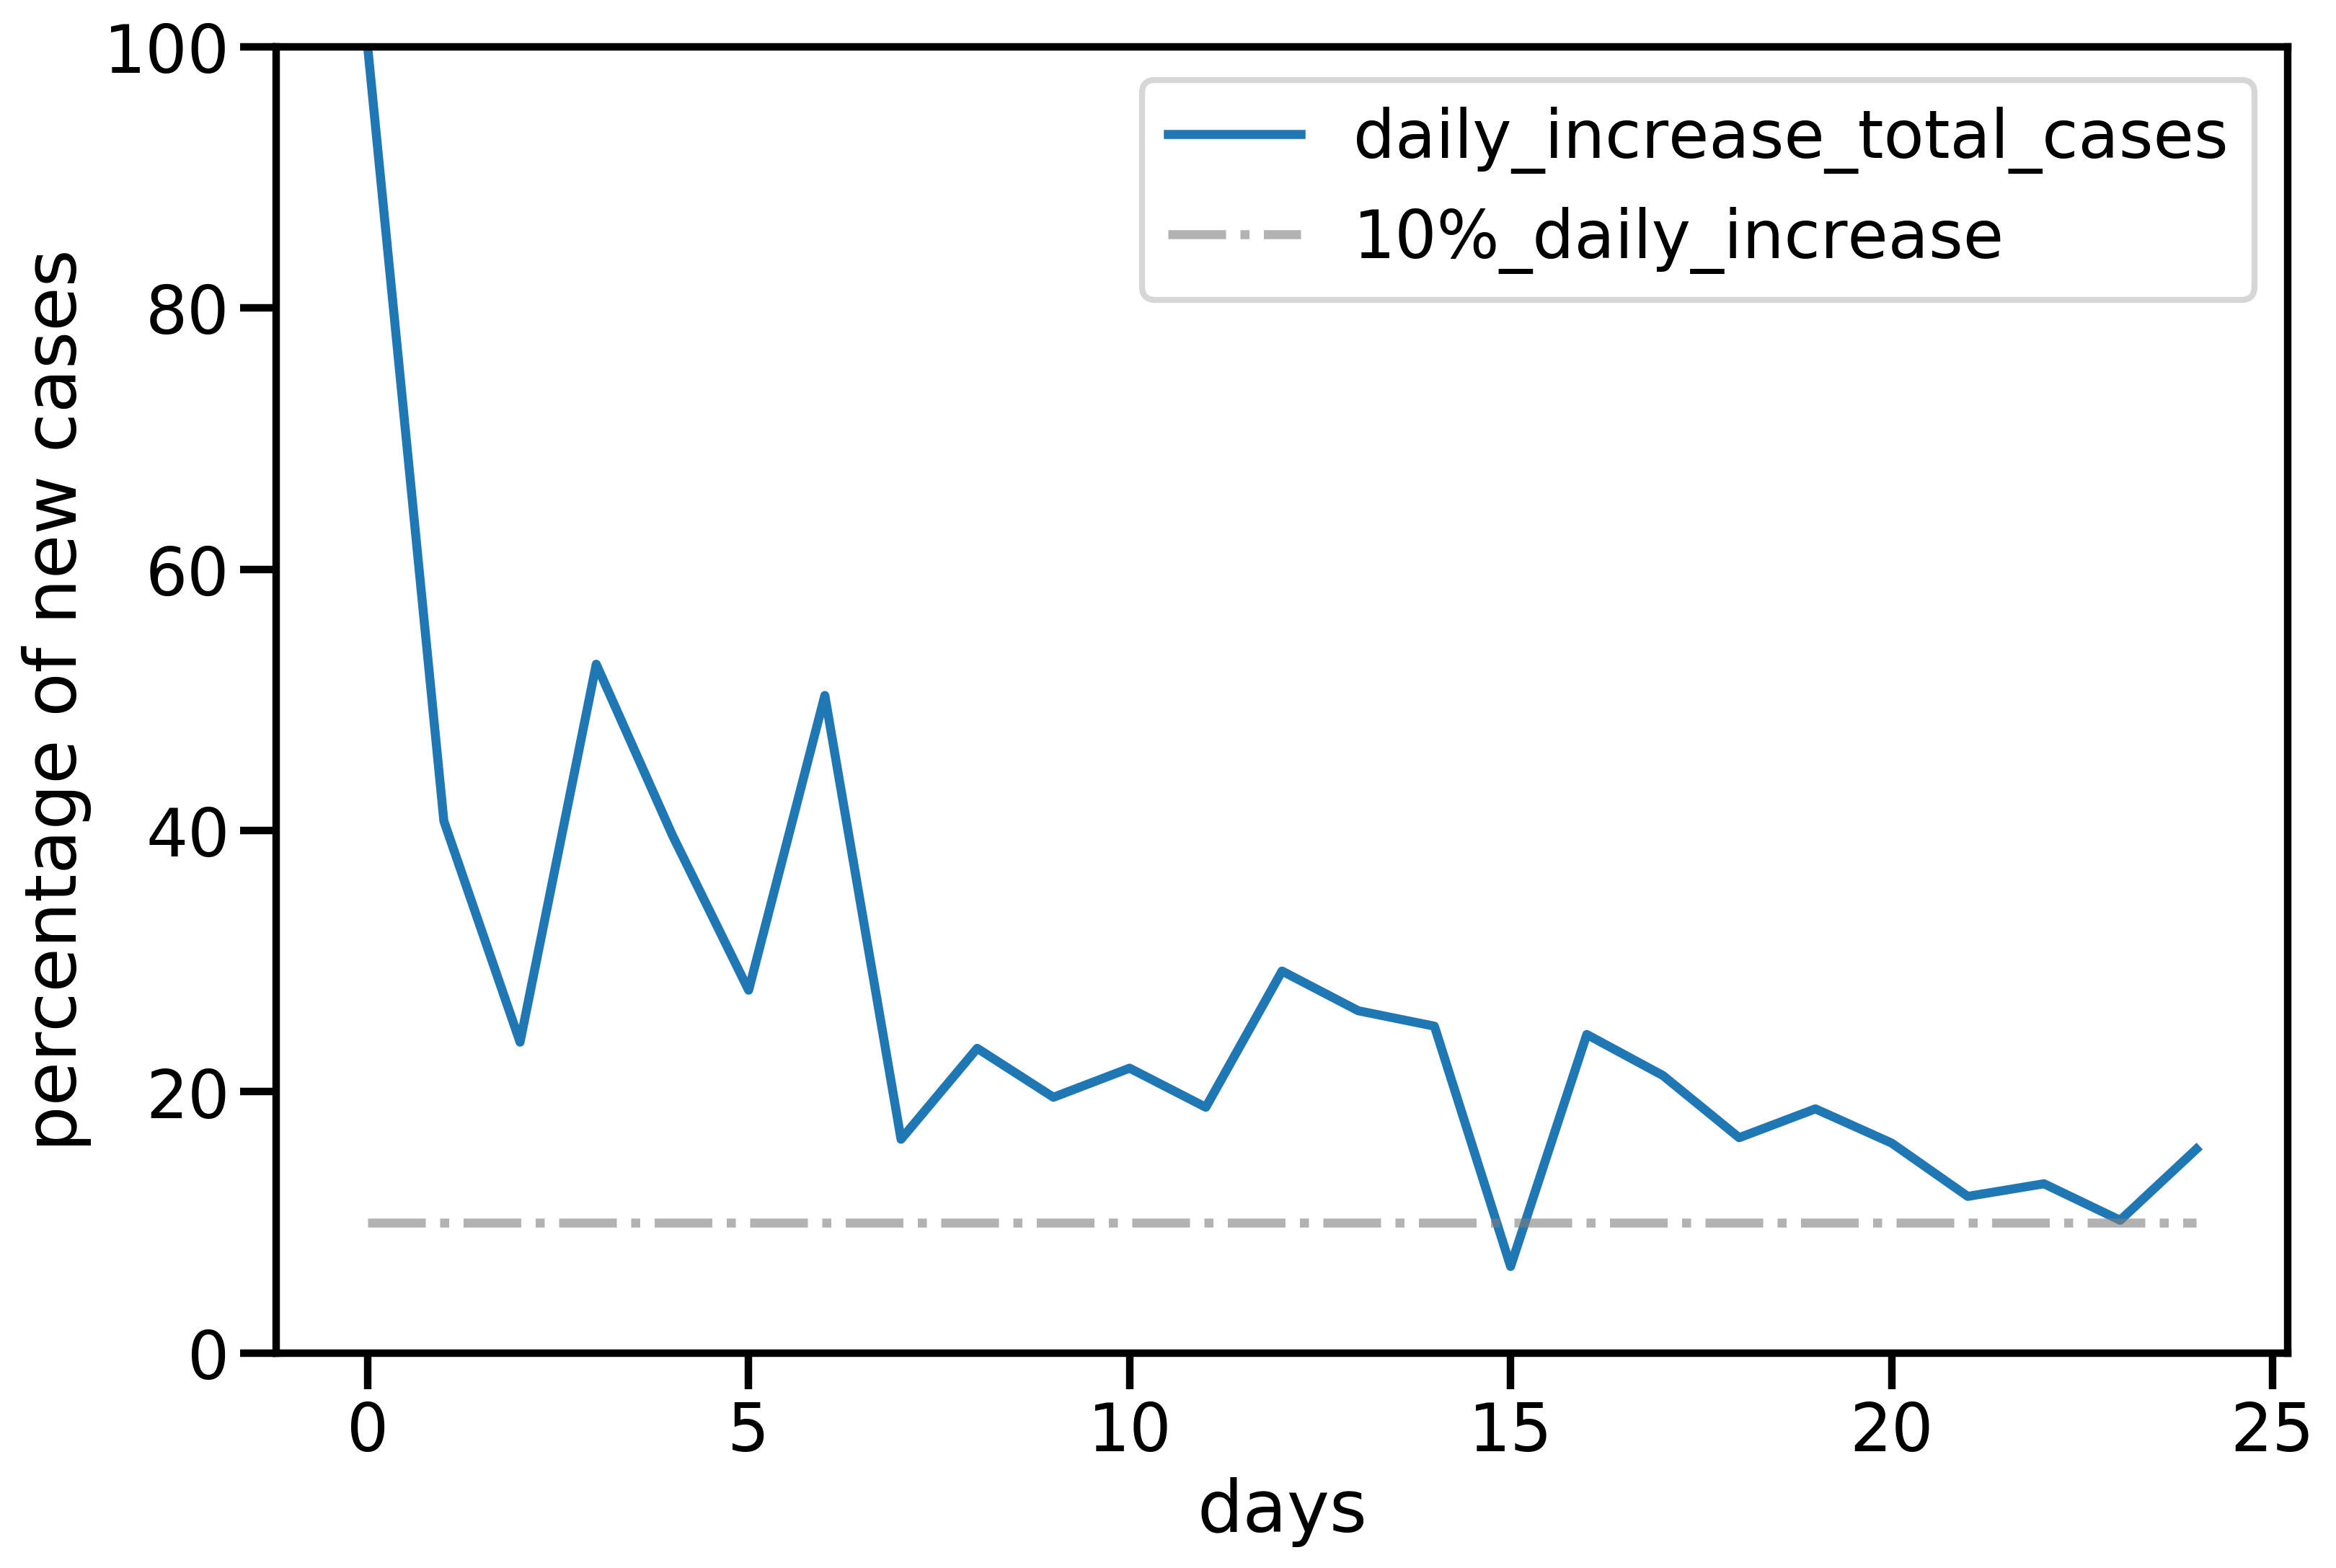

In [44]:
df['incremento_giornaliero_percentuale'] = (df['nuovi_attualmente_positivi']/df['totale_attualmente_positivi_ieri'])*100

df['incremento_giornaliero_percentuale'].plot(label='daily_increase_total_cases')
plt.plot(np.repeat(10, len(df)), label='10%_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new cases')

plt.legend()

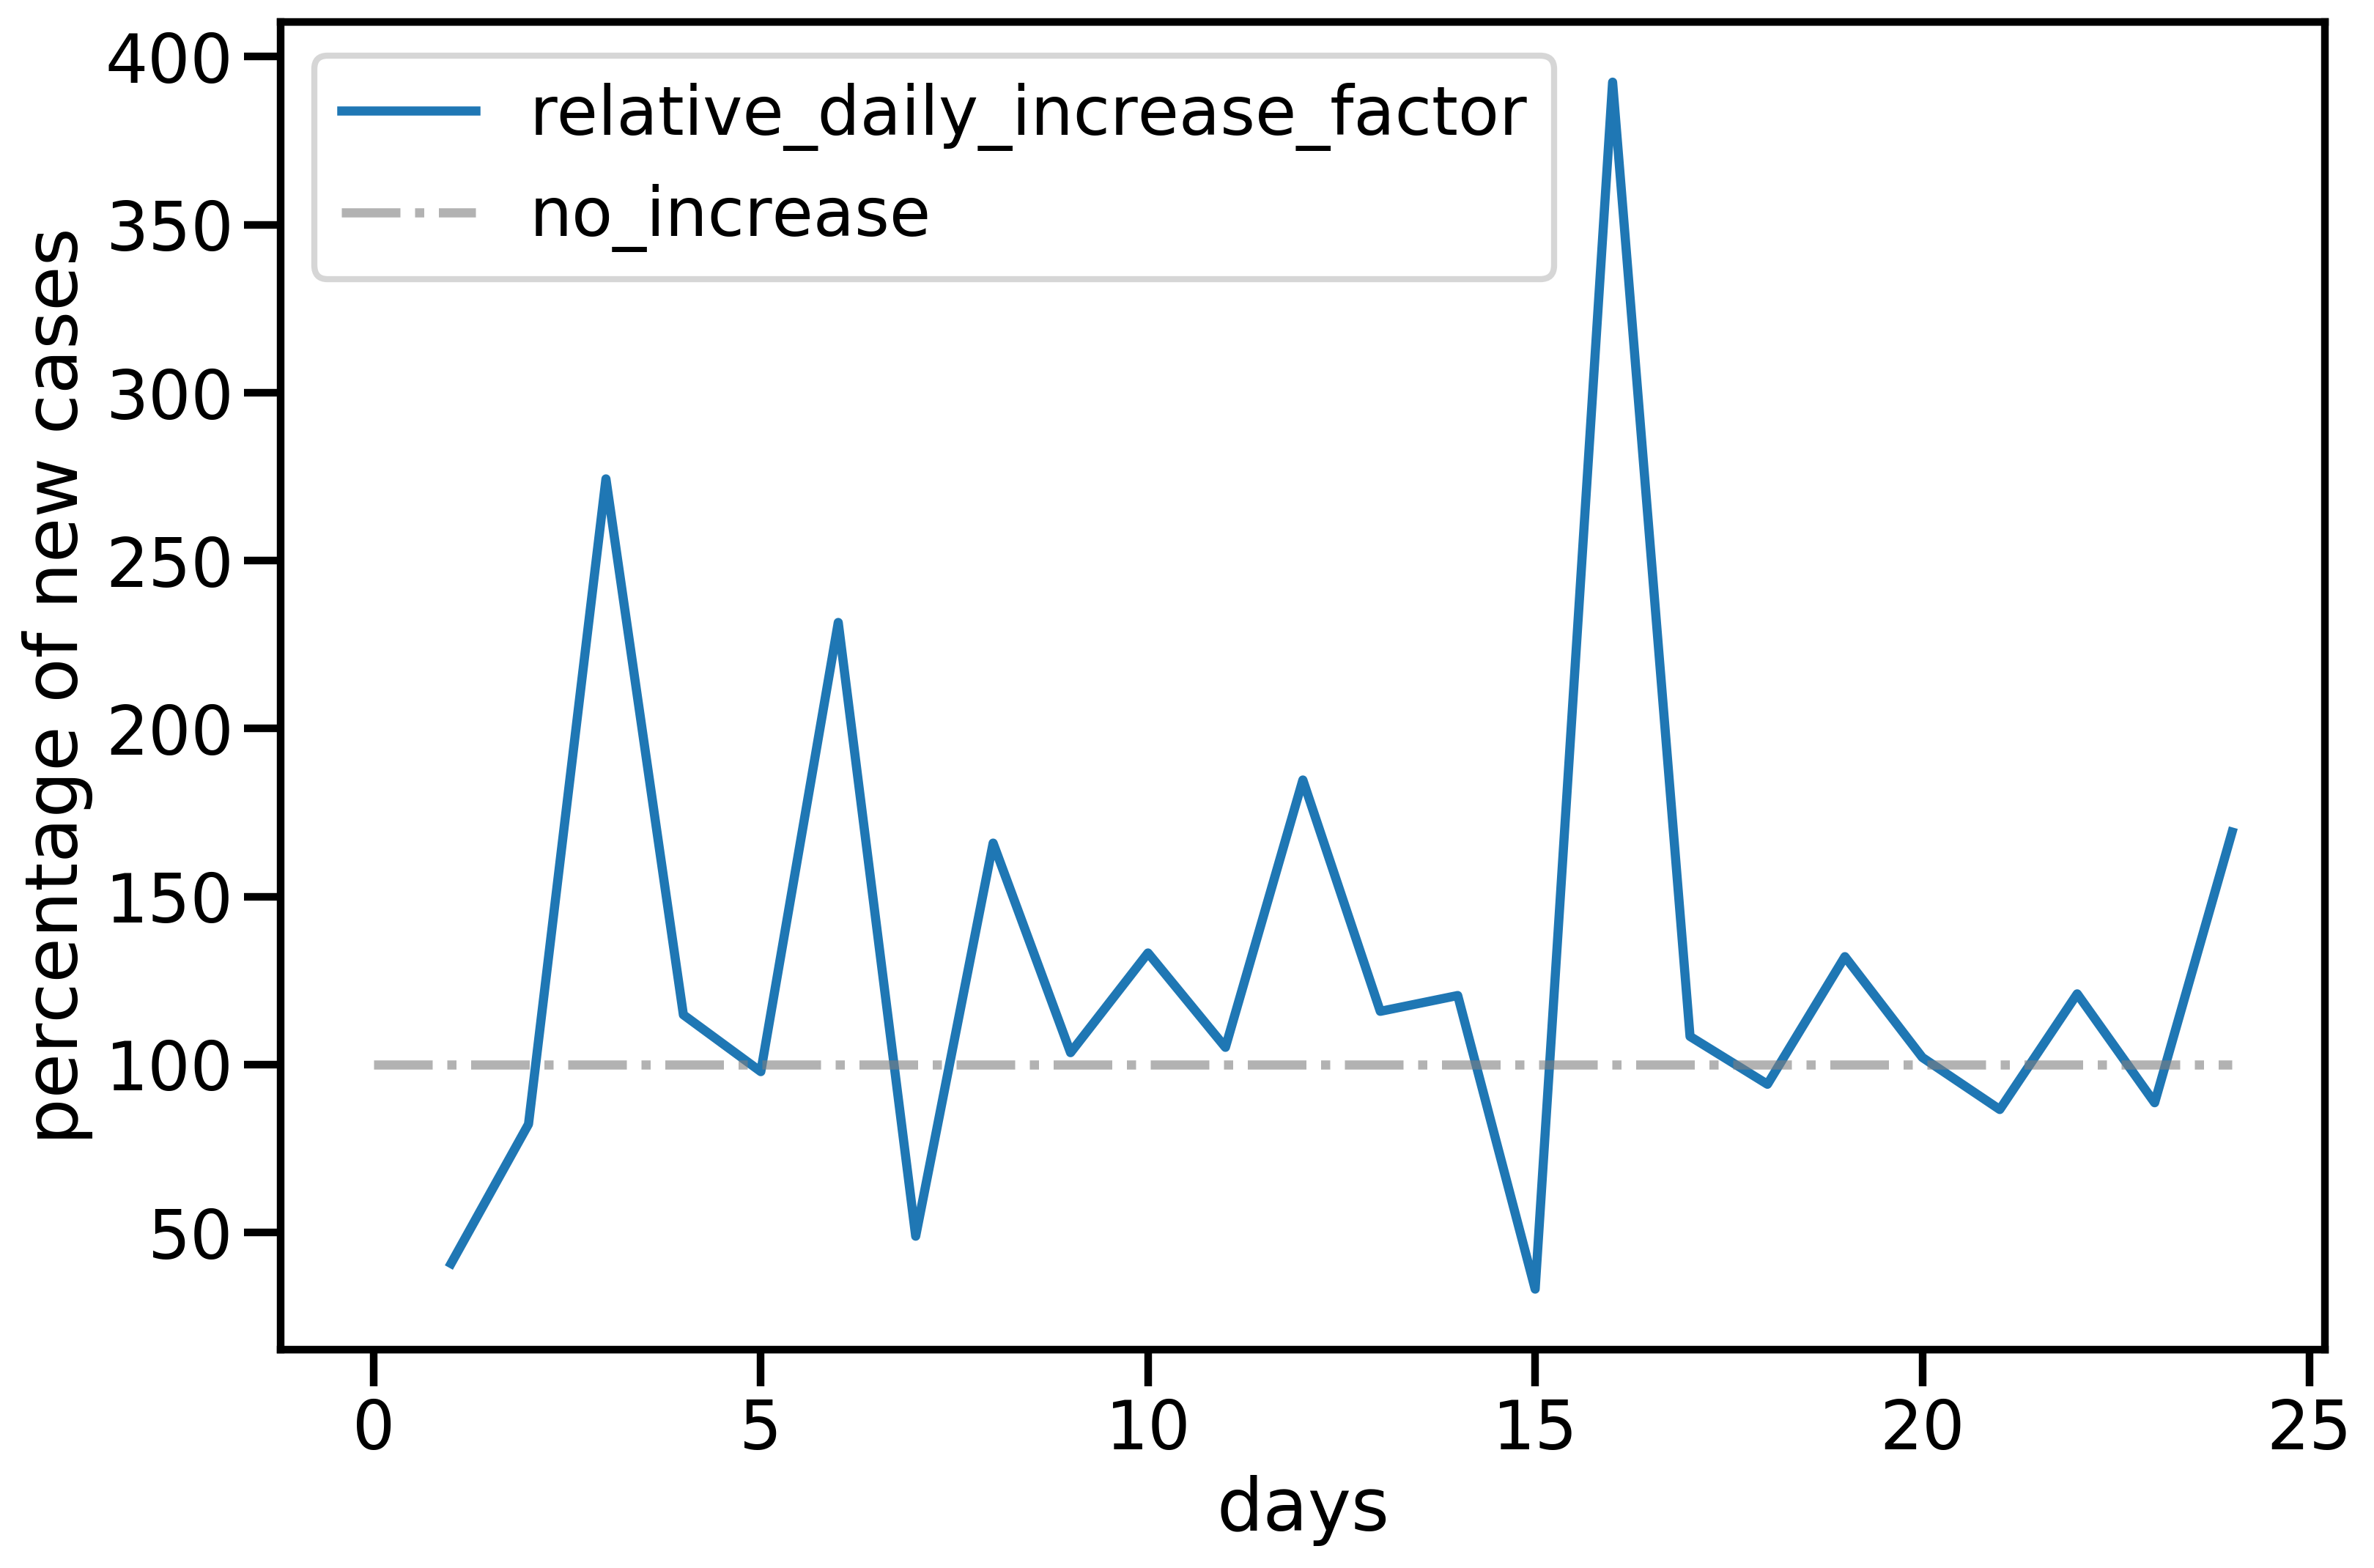

In [45]:
df['incremento_giornaliero_relativo_percentuale'] = (df['nuovi_attualmente_positivi']/df['nuovi_positivi_ieri'])*100

df['incremento_giornaliero_relativo_percentuale'].plot(label='relative_daily_increase_factor')
plt.plot(np.repeat(100, len(df)), label='no_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new cases')

plt.legend()

In [29]:
ICU_yesterday = df['terapia_intensiva']
ICU_yesterday = pd.concat([pd.Series([0]), ICU_yesterday])
ICU_yesterday = ICU_yesterday.reset_index()
del ICU_yesterday['index']

ICU_yesterday.drop((len(ICU_yesterday)-1))

df['terapia_intensiva_ieri'] = ICU_yesterday

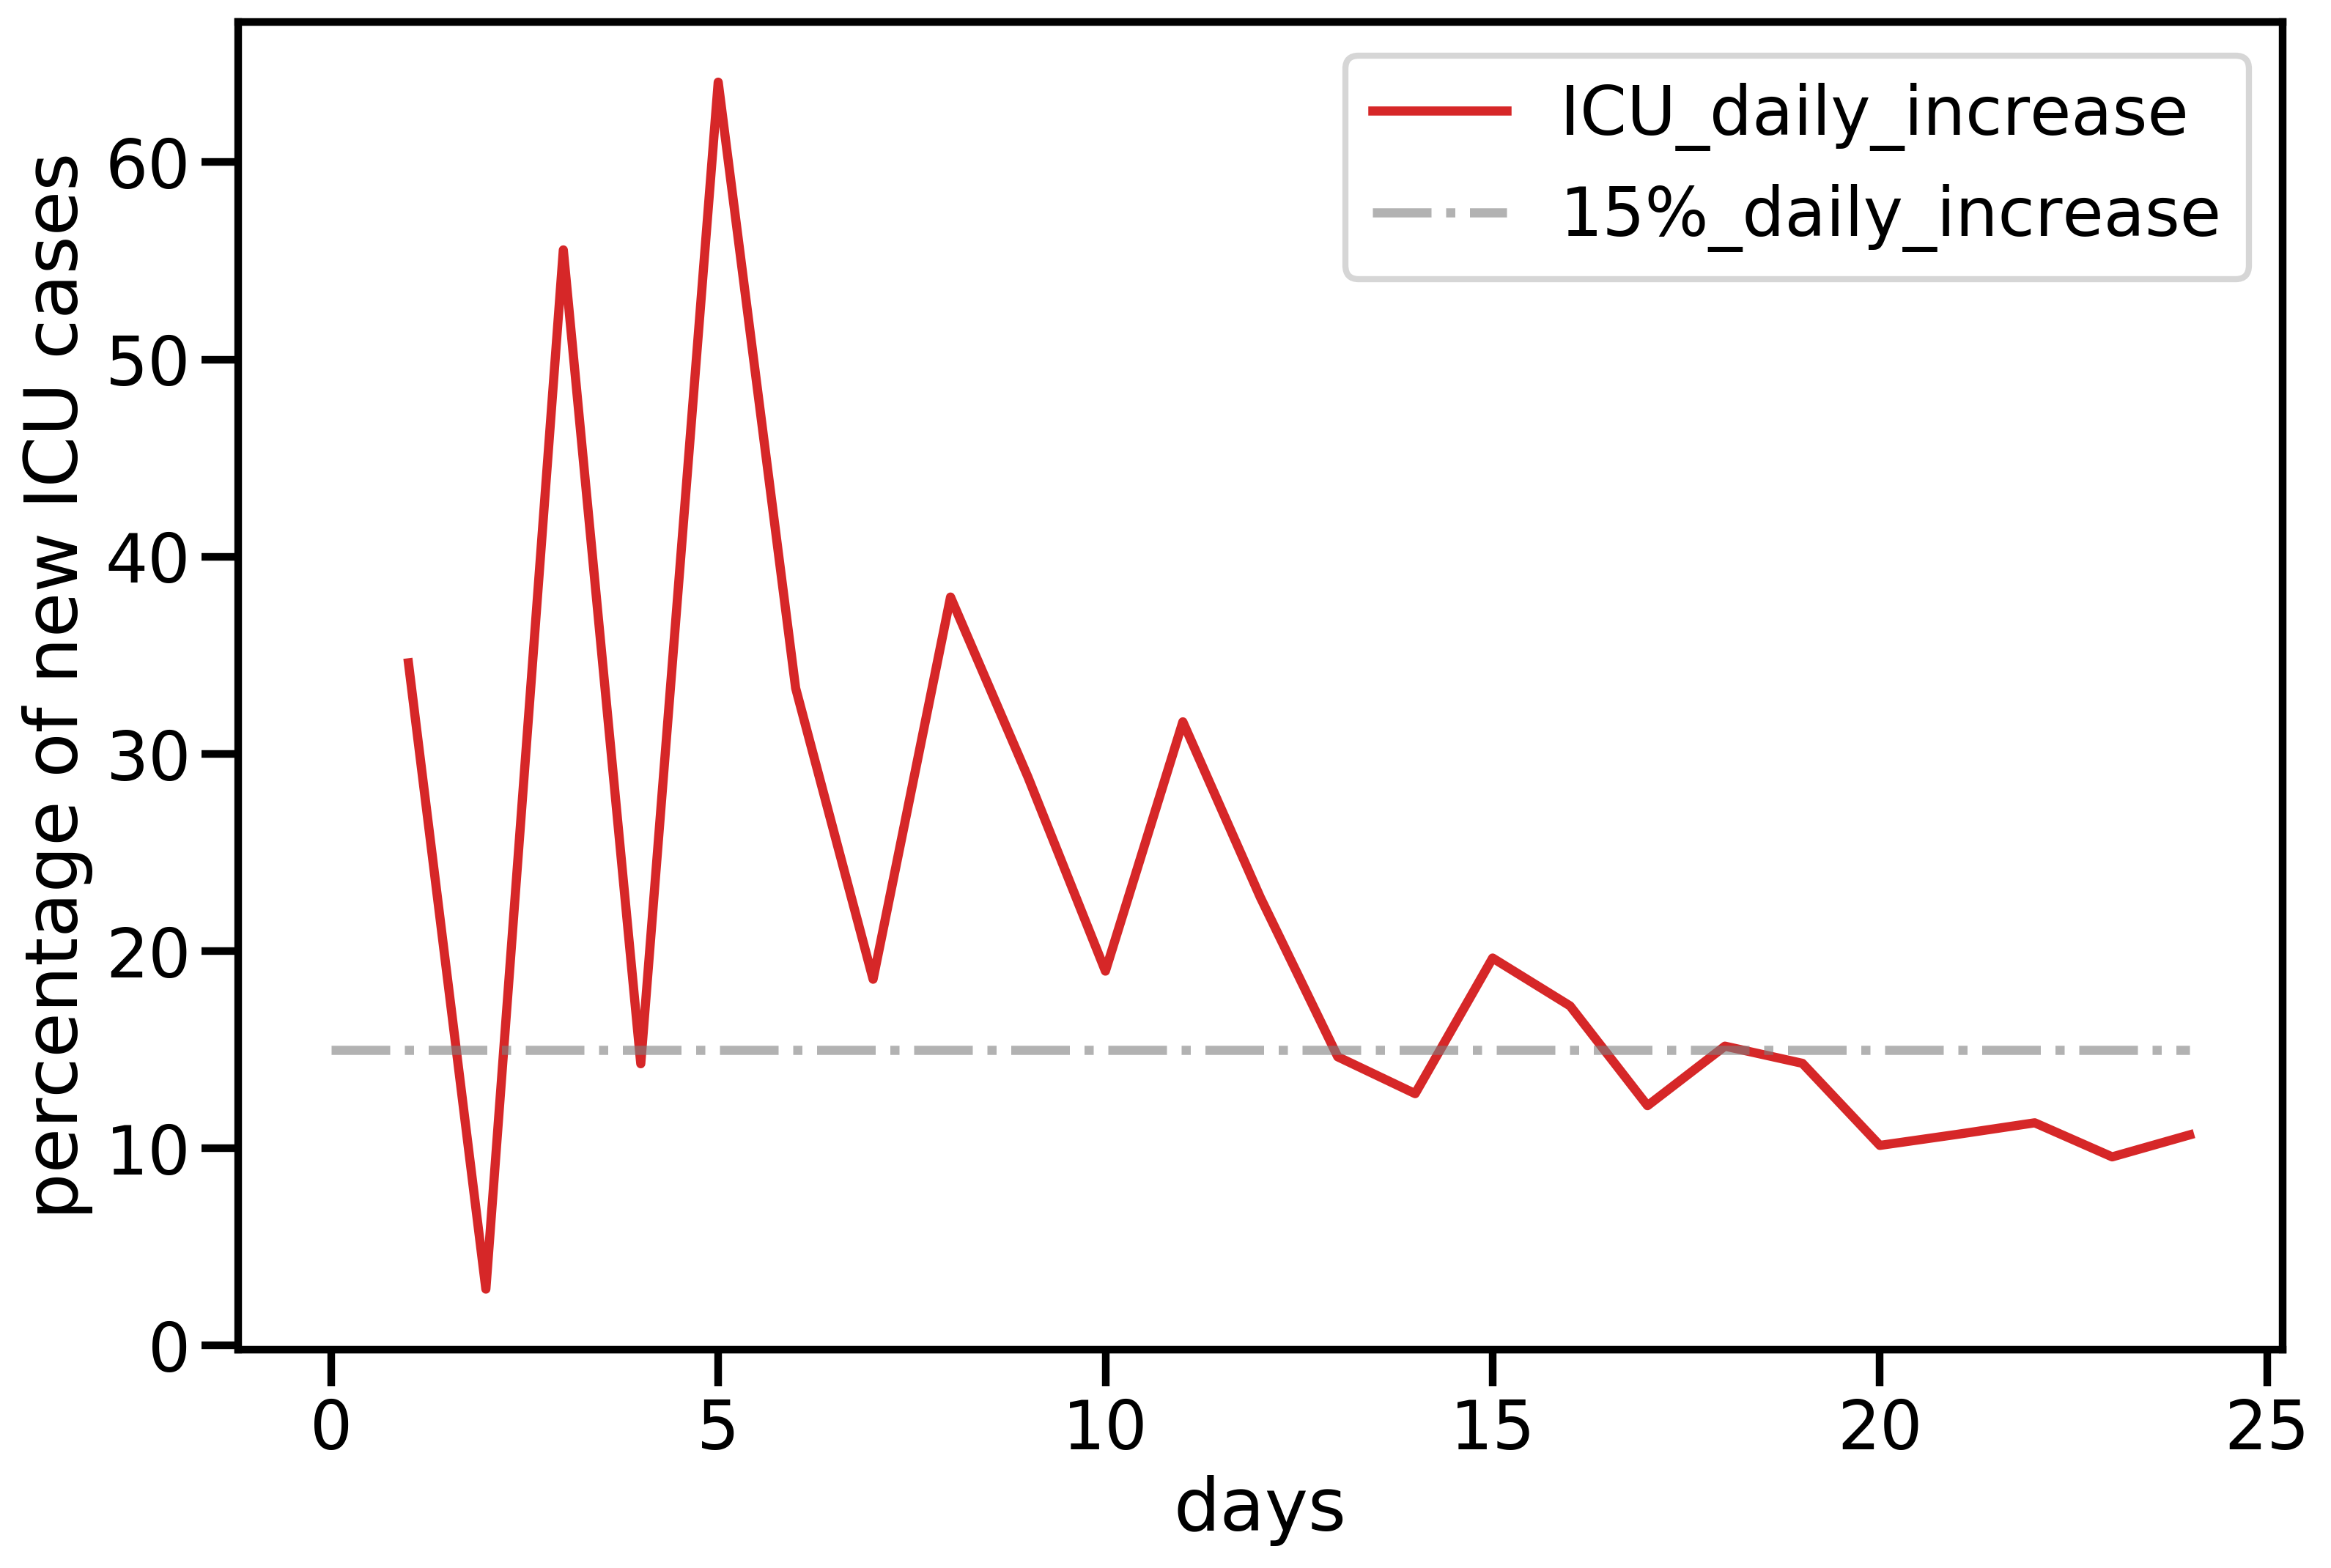

In [46]:
df['incremento_ICU_relativo_percentuale'] = ((df['terapia_intensiva']-df['terapia_intensiva_ieri'])/df['terapia_intensiva_ieri'])*100

df['incremento_ICU_relativo_percentuale'].plot(label='ICU_daily_increase', color='#d62728')
plt.plot(np.repeat(15, len(df)), label='15%_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new ICU cases')

plt.legend()

In [39]:
hospitalization_yesterday = df['totale_ospedalizzati']
hospitalization_yesterday = pd.concat([pd.Series([0]), hospitalization_yesterday])
hospitalization_yesterday = hospitalization_yesterday.reset_index()
del hospitalization_yesterday['index']

hospitalization_yesterday.drop((len(hospitalization_yesterday)-1))

df['totale_ospedalizzati_ieri'] = hospitalization_yesterday

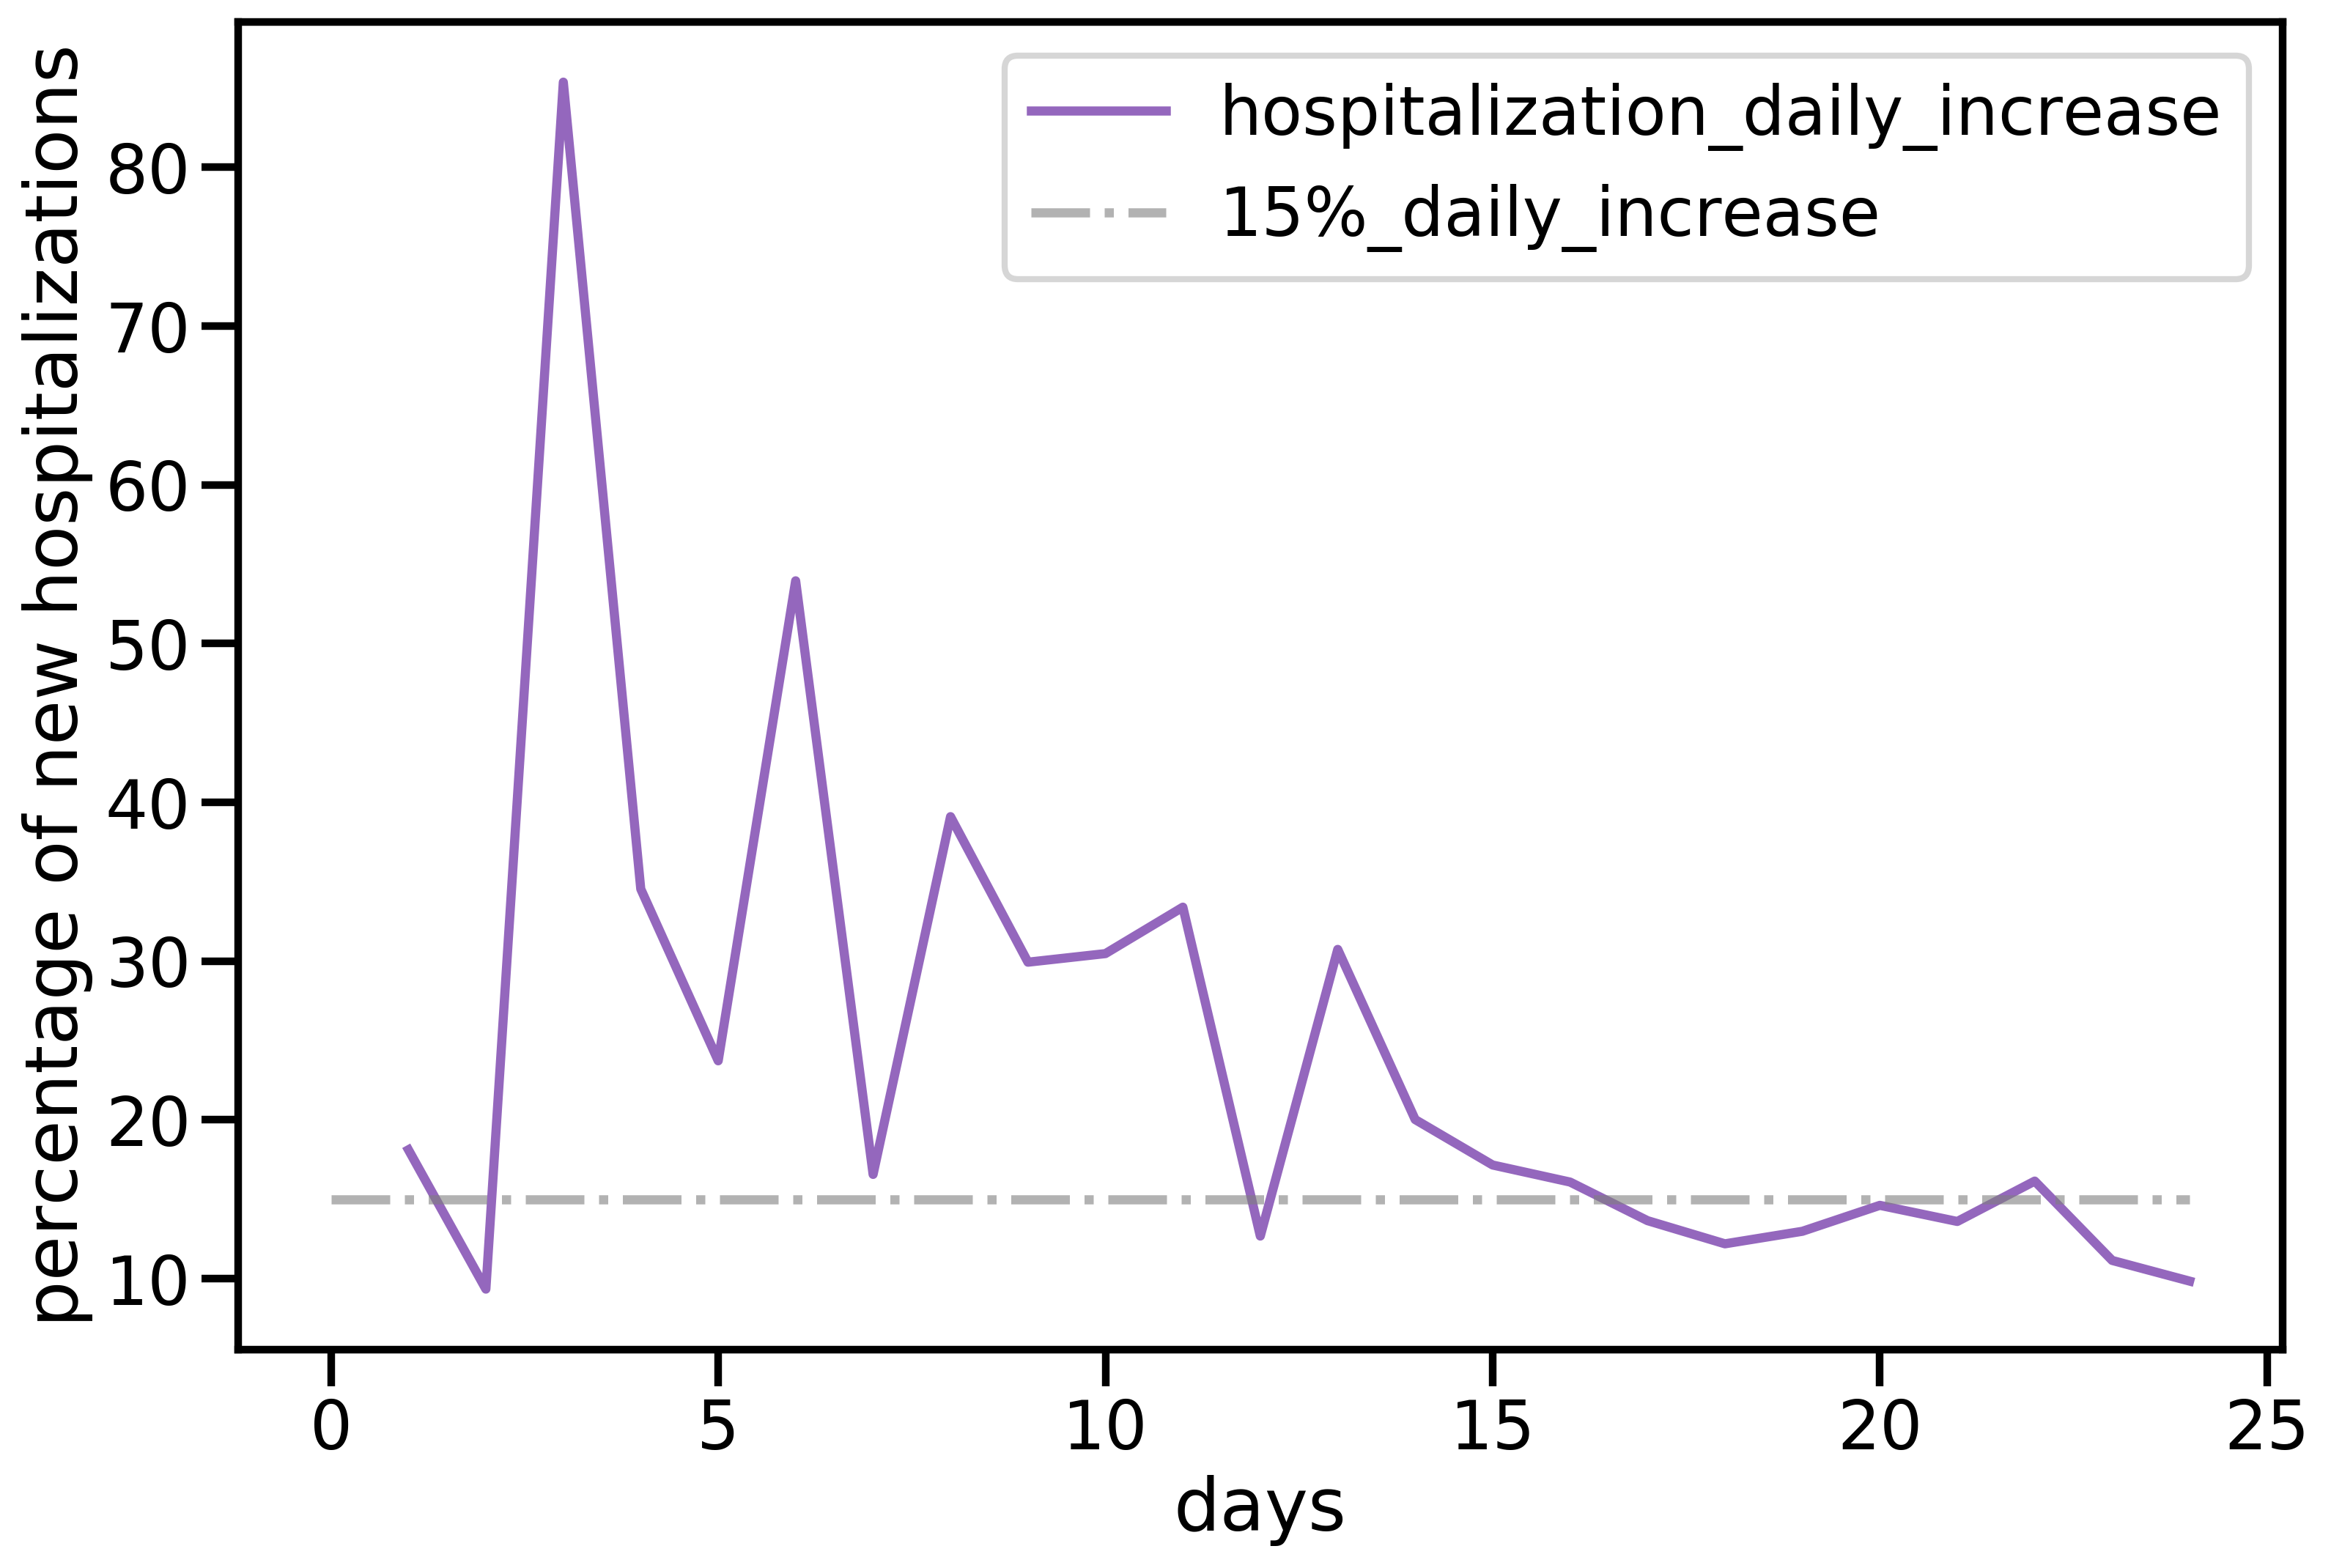

In [47]:
df['incremento_ospitalizzati_relativo_percentuale'] = ((df['totale_ospedalizzati']-df['totale_ospedalizzati_ieri'])/df['totale_ospedalizzati_ieri'])*100

df['incremento_ospitalizzati_relativo_percentuale'].plot(label='hospitalization_daily_increase', color='#9467bd')
plt.plot(np.repeat(15, len(df)), label='15%_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new hospitalizations')

plt.legend()

In [42]:
deceased_yesterday = df['deceduti']
deceased_yesterday = pd.concat([pd.Series([0]), deceased_yesterday])
deceased_yesterday = deceased_yesterday.reset_index()
del deceased_yesterday['index']

deceased_yesterday.drop((len(deceased_yesterday)-1))

df['deceduti_ieri'] = deceased_yesterday

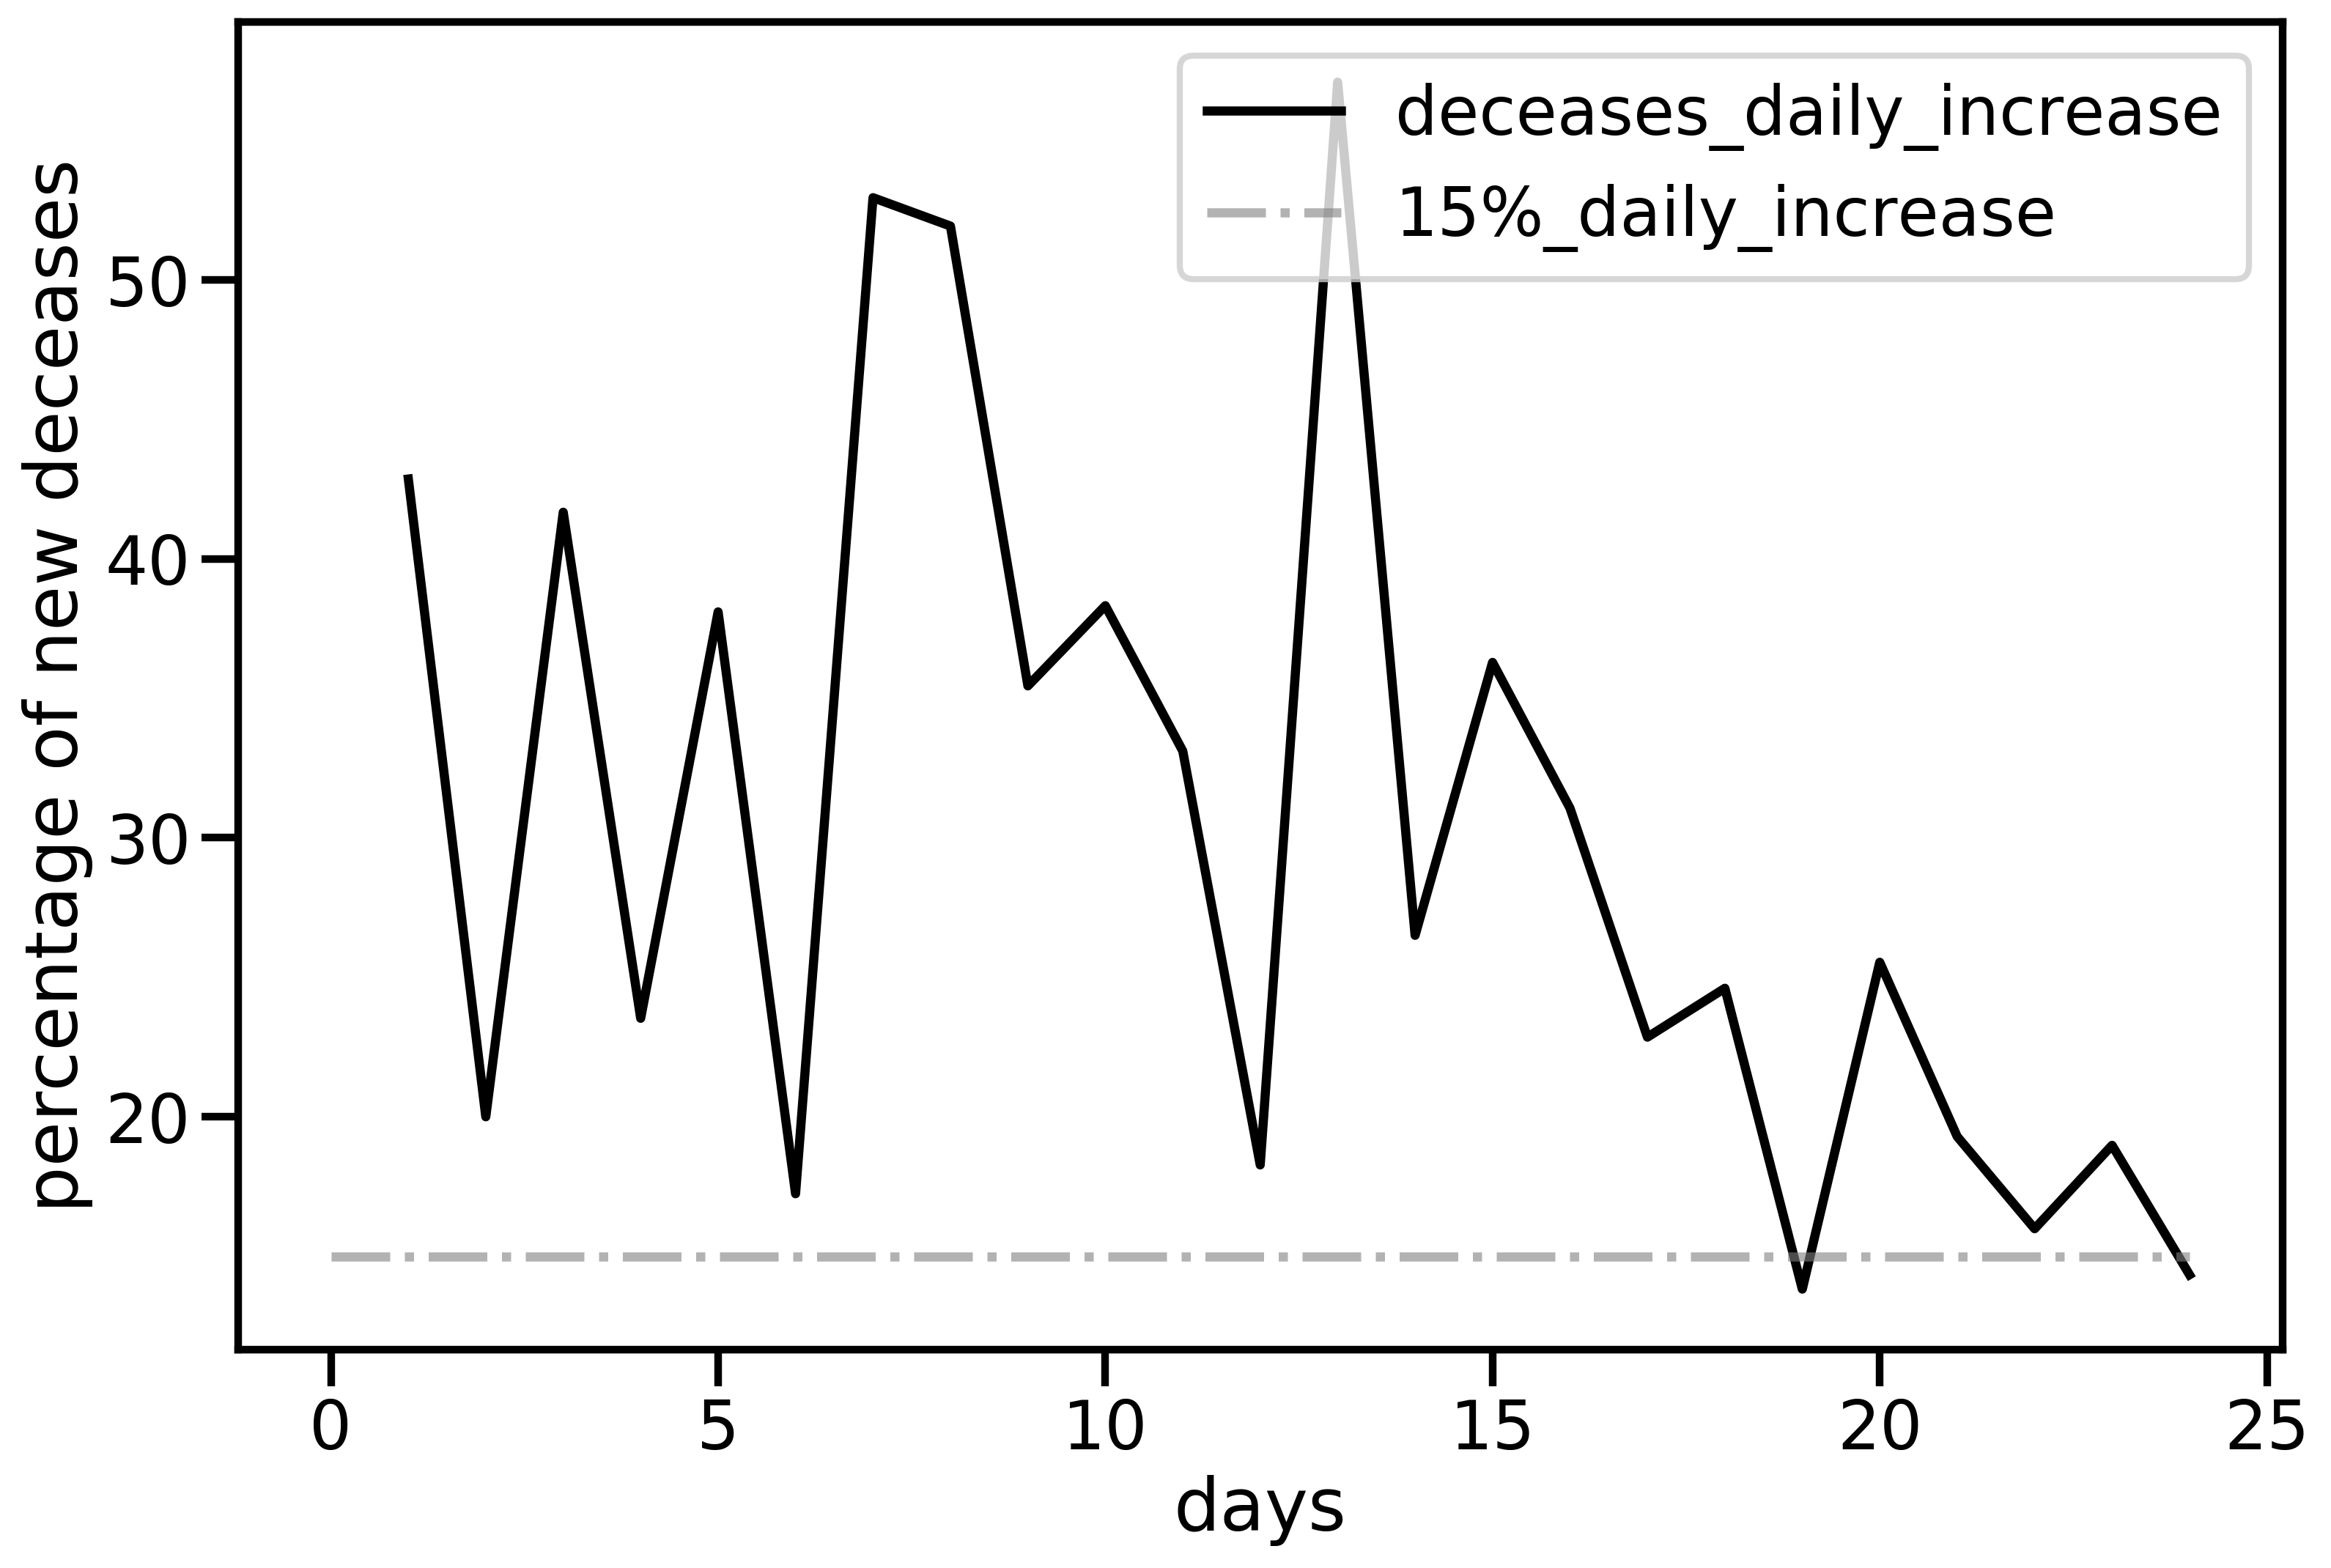

In [48]:
df['incremento_decessi_relativo_percentuale'] = ((df['deceduti']-df['deceduti_ieri'])/df['deceduti_ieri'])*100

df['incremento_decessi_relativo_percentuale'].plot(label='deceases_daily_increase', color='black')
plt.plot(np.repeat(15, len(df)), label='15%_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new deceases')

plt.legend()

In [51]:
home_isolation_yesterday = df['isolamento_domiciliare']
home_isolation_yesterday = pd.concat([pd.Series([0]), home_isolation_yesterday])
home_isolation_yesterday = home_isolation_yesterday.reset_index()
del home_isolation_yesterday['index']

home_isolation_yesterday.drop((len(home_isolation_yesterday)-1))

df['isolamento_domiciliare_ieri'] = home_isolation_yesterday

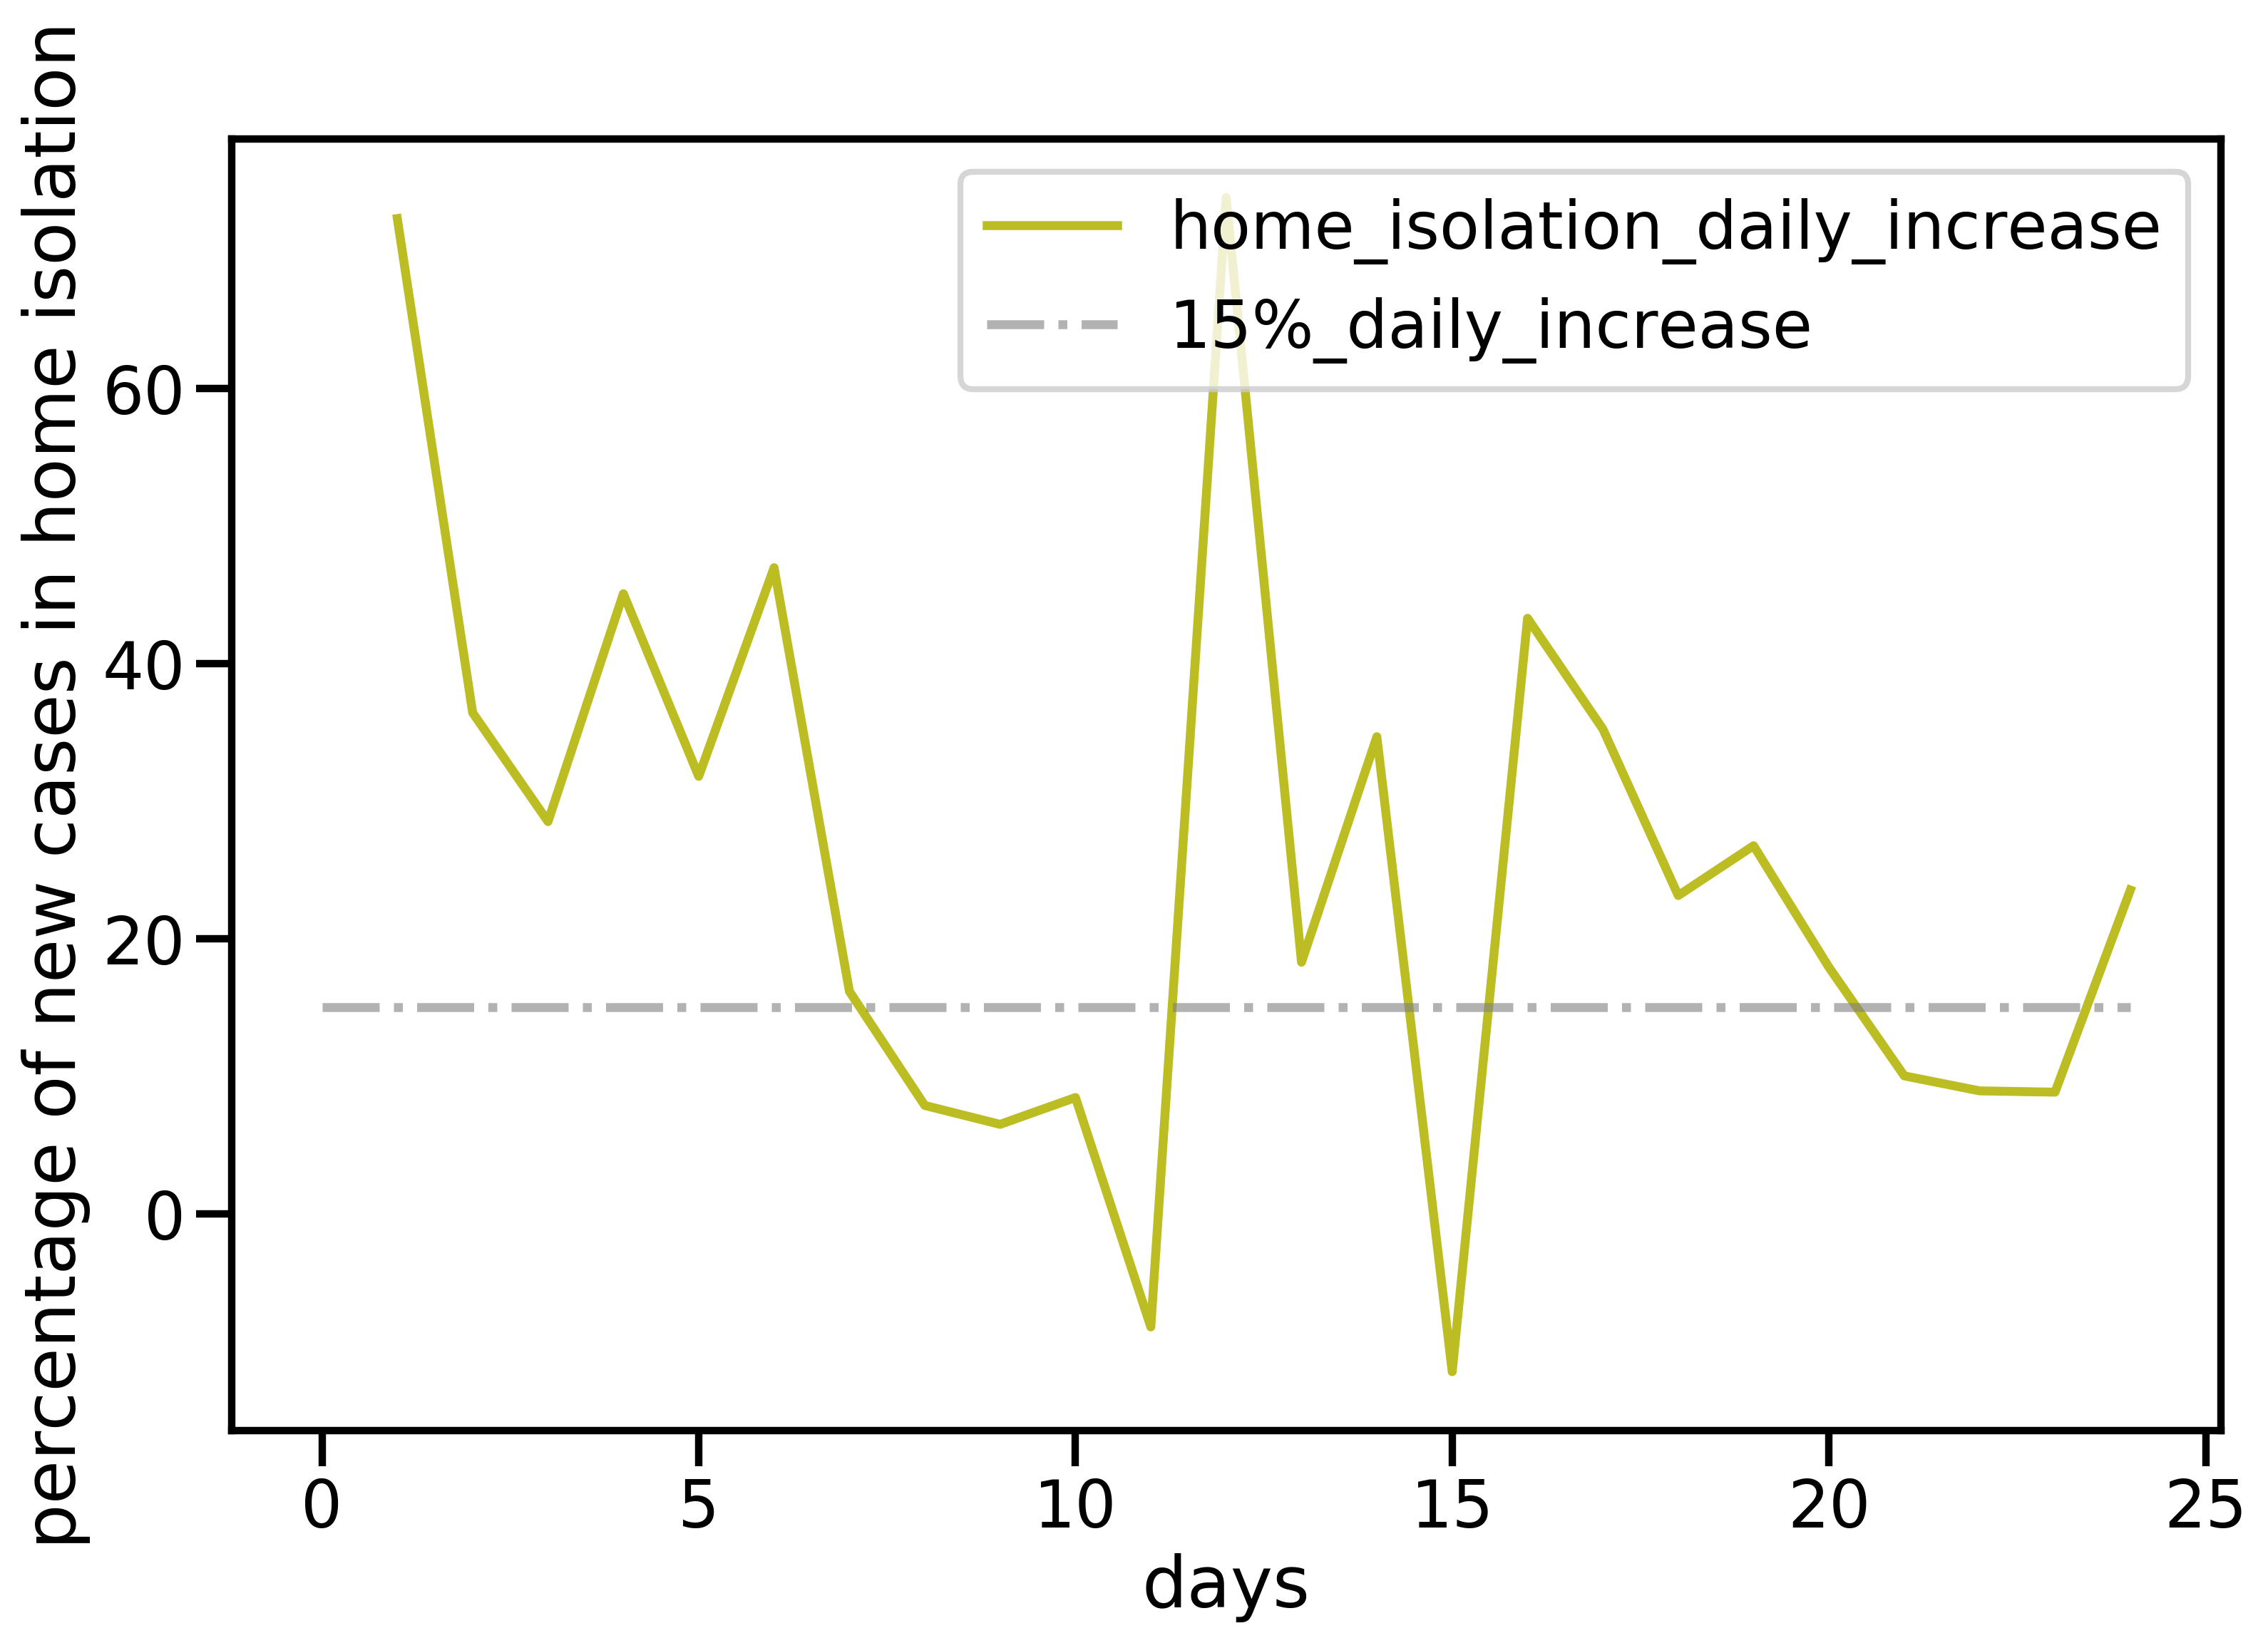

In [52]:
df['incremento_isolamento_domiciliare_relativo_percentuale'] = ((df['isolamento_domiciliare']-df['isolamento_domiciliare_ieri'])/df['isolamento_domiciliare_ieri'])*100

df['incremento_isolamento_domiciliare_relativo_percentuale'].plot(label='home_isolation_daily_increase', color='#bcbd22')
plt.plot(np.repeat(15, len(df)), label='15%_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new cases in home isolation')

plt.legend()

Text(0, 0.5, 'percentage')

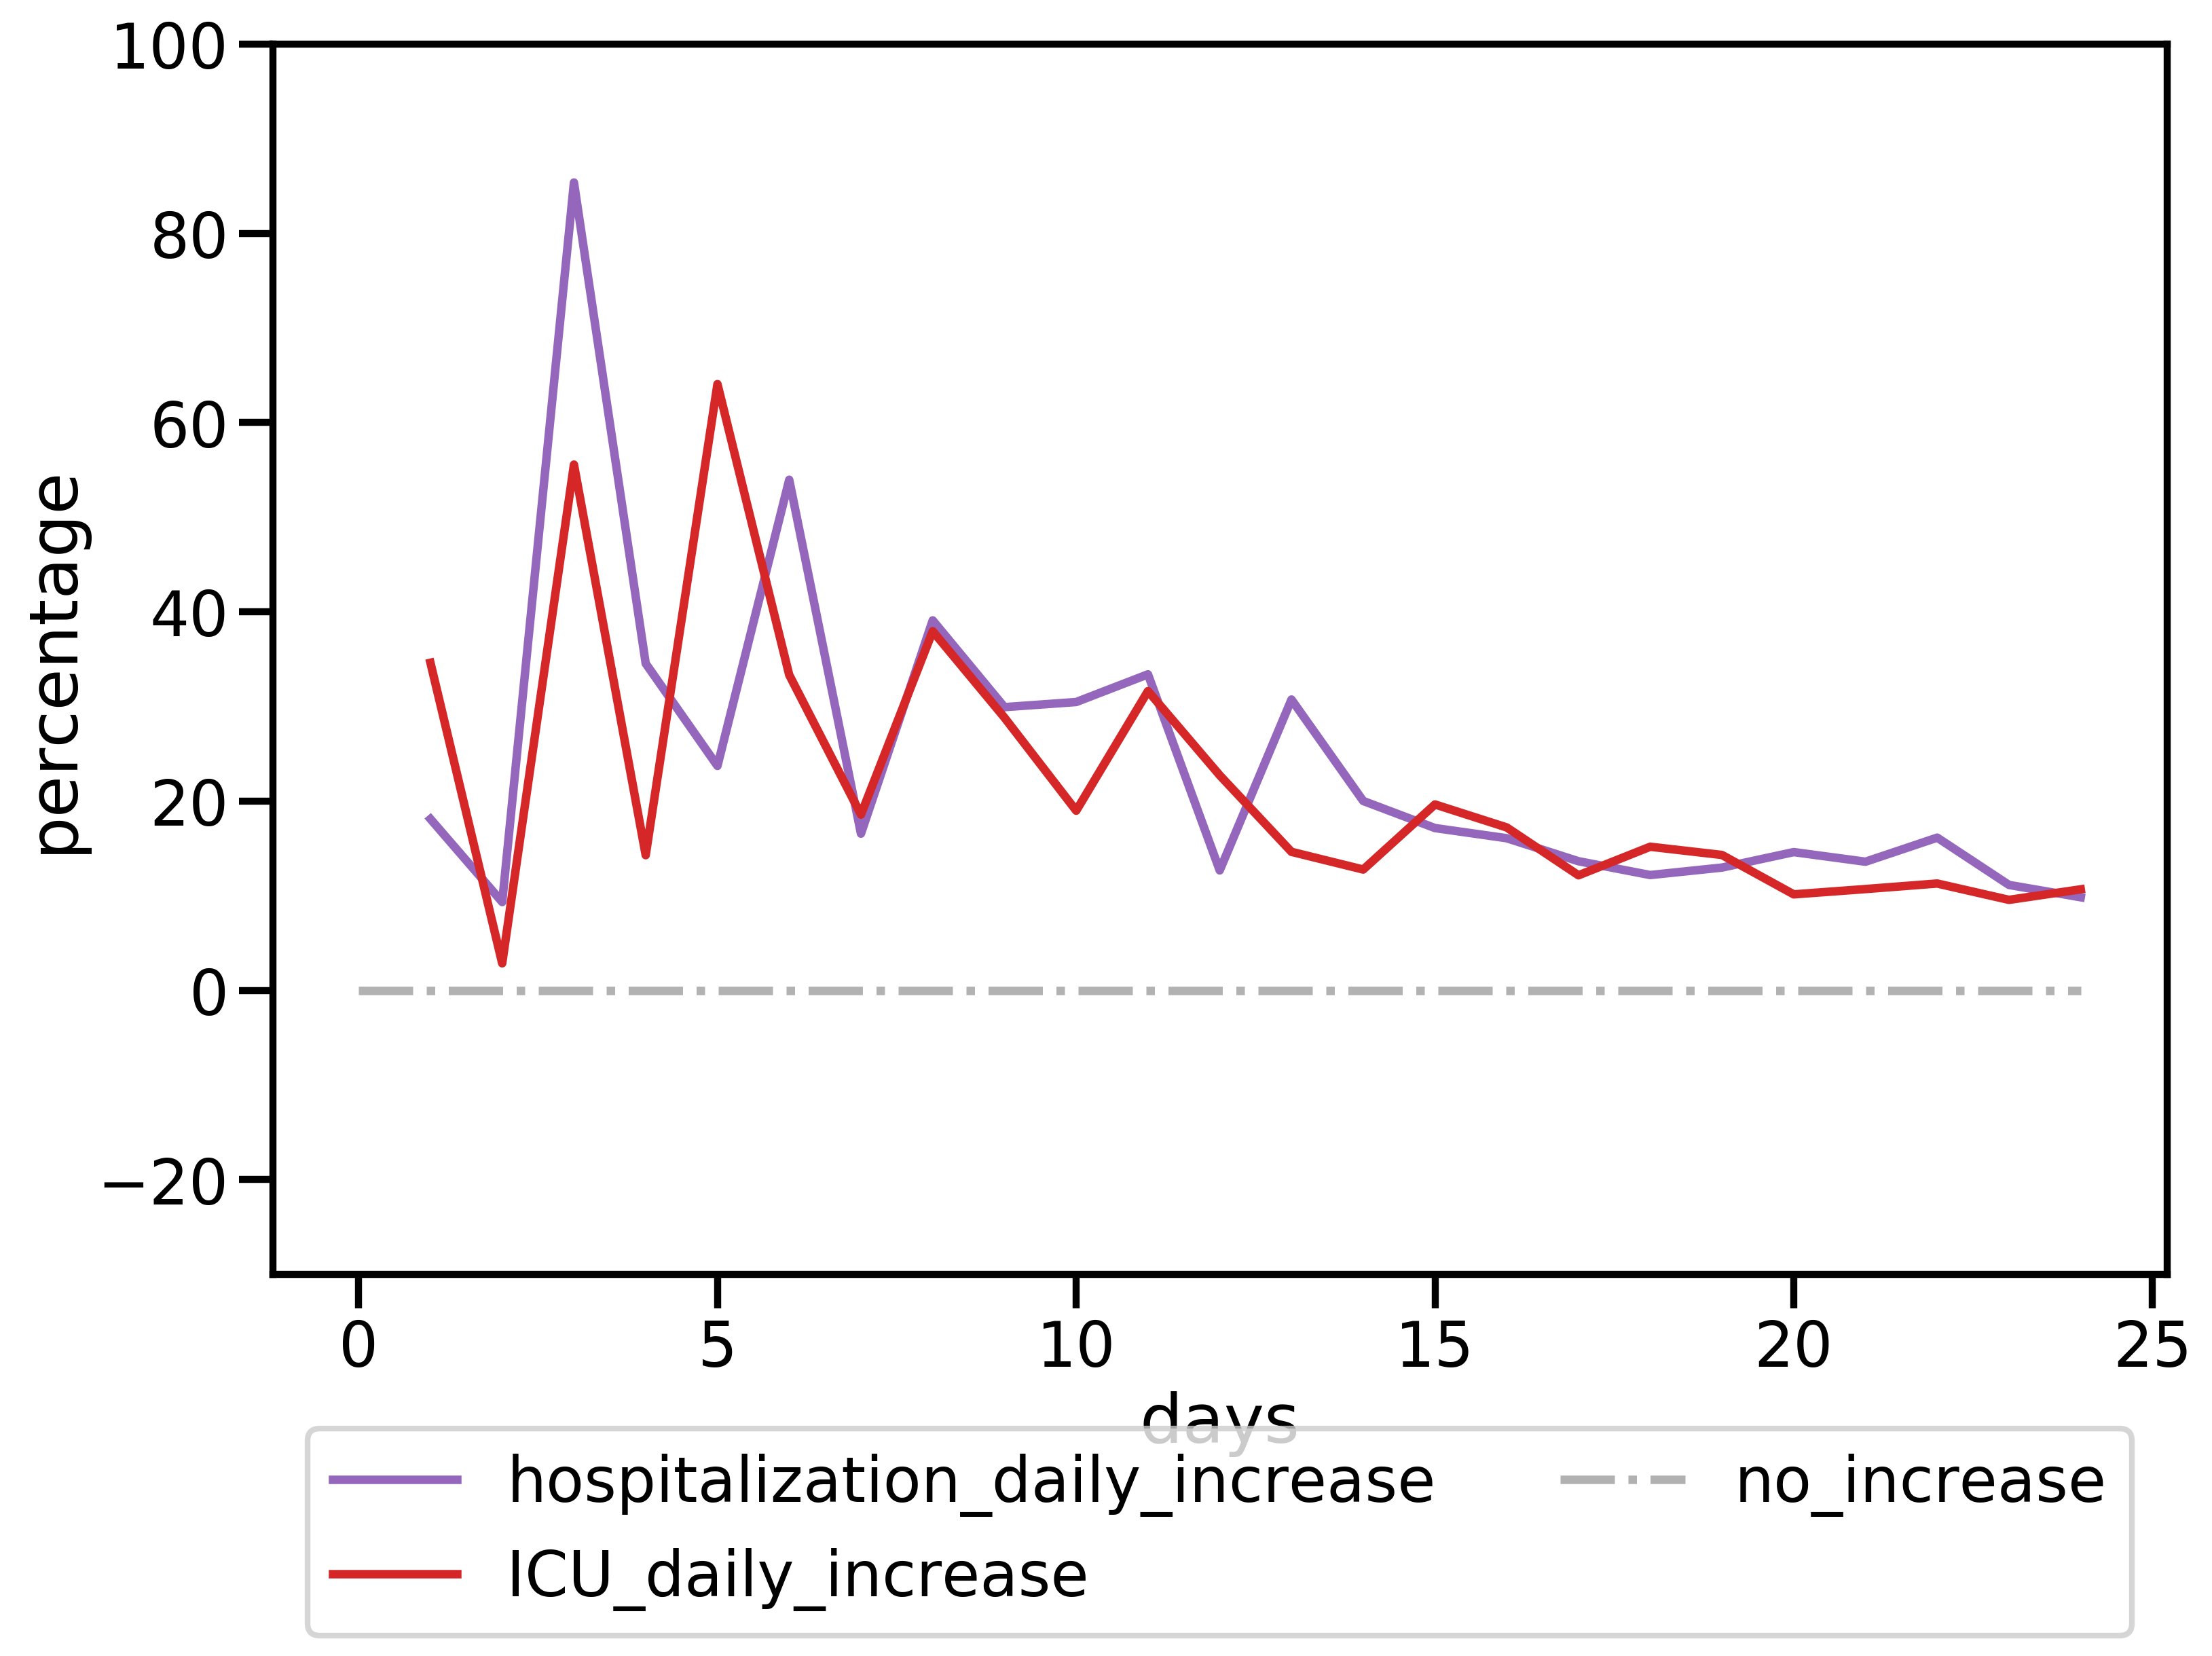

In [68]:
# plt.rcParams["figure.figsize"] = (16,12)

# df['incremento_giornaliero_percentuale'].plot(label='total_cases_increase')
# df['incremento_isolamento_domiciliare_relativo_percentuale'].plot(label='home_isolation_daily_increase', color='#bcbd22')
df['incremento_ospitalizzati_relativo_percentuale'].plot(label='hospitalization_daily_increase', color='#9467bd')
df['incremento_ICU_relativo_percentuale'].plot(label='ICU_daily_increase', color='#d62728')
# df['incremento_decessi_relativo_percentuale'].plot(label='deceases_daily_increase', color='black')

plt.plot(np.repeat(0, len(df)), label='no_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)

plt.ylim(-30, 100)

plt.xlabel('days')
plt.ylabel('percentage')